In [1]:
# Import dependencies.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
prices_df = pd.read_csv(Path('./resources/prices.csv'))
prices_df.head()

,year_month,geography,timeframe,date,type,avg_price,total_volume,4046_units,4225_units,4770_units,total_bags,s_bags,l_bags,xl_bags
0,1/1/2017,Albany,Weekly,1/2/2017,conventional,1.47,129948.23,4845.77,117027.41,200.36,7874.69,7866.86,7.83,0.00
1,1/1/2017,Atlanta,Weekly,1/2/2017,conventional,0.93,547565.88,224073.54,118926.37,337.48,204228.49,111599.58,92628.91,0.00
2,1/1/2017,Baltimore/Washington,Weekly,1/2/2017,conventional,1.47,631760.81,54530.42,408952.26,14387.01,153891.12,151345.59,2542.41,3.12
3,1/1/2017,Boise,Weekly,1/2/2017,conventional,0.92,104510.11,27845.16,9408.92,11341.75,55914.28,53093.47,2793.61,27.20
4,1/1/2017,Boston,Weekly,1/2/2017,conventional,1.29,458830.49,4119.90,371223.34,3933.72,79553.53,79339.78,213.75,0.00


In [3]:
print(prices_df.shape)

(20410, 14)


In [4]:
prices_df.columns

Index(['year_month', 'geography', 'timeframe', 'date', 'type', 'avg_price',
       'total_volume', '4046_units', '4225_units', '4770_units', 'total_bags',
       's_bags', 'l_bags', 'xl_bags'],
      dtype='object')

# Pre-Processing

In [5]:
def findNull(values):
    print(values.shape)
    index = 0
    for j in values:
        if not np.isfinite(j):
            print(index, j)
        index +=1

In [6]:
prices_df.describe()

,avg_price,total_volume,4046_units,4225_units,4770_units,total_bags,s_bags,l_bags,xl_bags
count,20410.000000,2.041000e+04,2.041000e+04,2.041000e+04,2.041000e+04,2.041000e+04,2.041000e+04,2.041000e+04,2.041000e+04
mean,1.403946,1.038861e+06,3.106387e+05,2.699807e+05,1.882848e+04,4.392905e+05,2.932754e+05,1.359081e+05,1.010696e+04
std,0.375572,4.192564e+06,1.335095e+06,1.111247e+06,8.602080e+04,1.784436e+06,1.165231e+06,6.036988e+05,5.648567e+04
min,0.440000,2.534500e+02,0.000000e+00,0.000000e+00,0.000000e+00,4.555000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.140000,1.838678e+04,6.909050e+02,2.686500e+03,0.000000e+00,1.299353e+04,9.263853e+03,1.176582e+03,0.000000e+00
50%,1.370000,1.481599e+05,1.299260e+04,2.187600e+04,1.613150e+02,6.942949e+04,4.835040e+04,1.080259e+04,0.000000e+00
75%,1.630000,5.418840e+05,1.248081e+05,1.270453e+05,3.975648e+03,2.128957e+05,1.425671e+05,5.453019e+04,1.569855e+03
max,3.170000,6.371614e+07,2.274362e+07,2.044550e+07,1.664383e+06,3.168919e+07,2.055041e+07,1.332760e+07,1.403184e+06


In [7]:
prices_df.count()

year_month      20410
geography       20410
timeframe       20410
date            20410
type            20410
avg_price       20410
total_volume    20410
4046_units      20410
4225_units      20410
4770_units      20410
total_bags      20410
s_bags          20410
l_bags          20410
xl_bags         20410
dtype: int64

In [8]:
prices_df.isnull()

,year_month,geography,timeframe,date,type,avg_price,total_volume,4046_units,4225_units,4770_units,total_bags,s_bags,l_bags,xl_bags
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20405,False,False,False,False,False,False,False,False,False,False,False,False,False,False
20406,False,False,False,False,False,False,False,False,False,False,False,False,False,False
20407,False,False,False,False,False,False,False,False,False,False,False,False,False,False
20408,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
prices_df = prices_df.dropna()

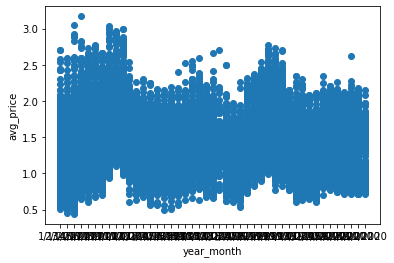

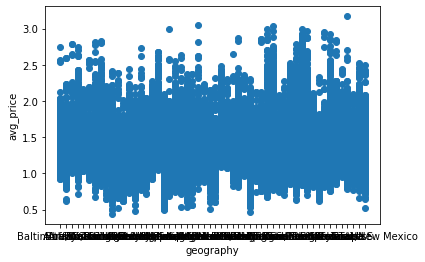

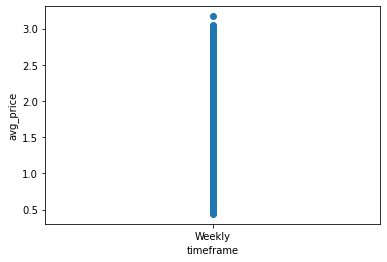

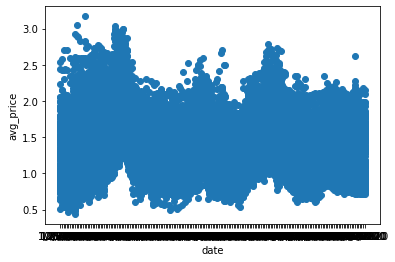

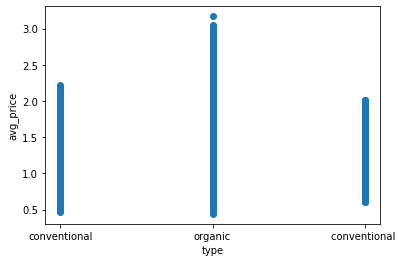

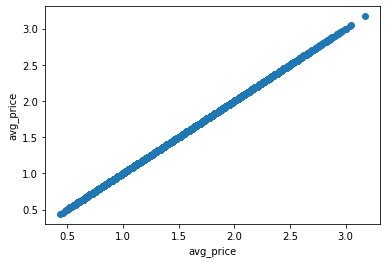

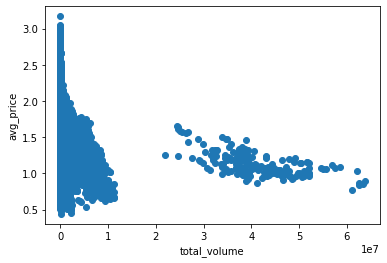

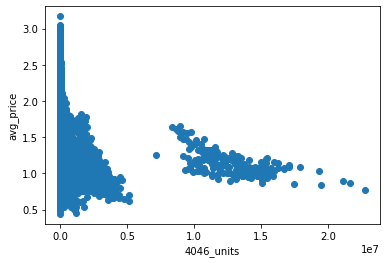

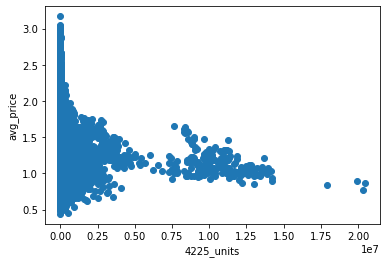

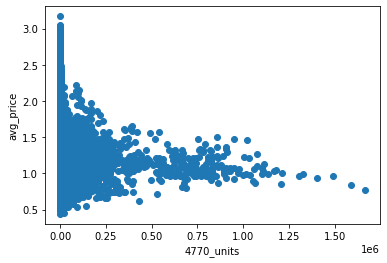

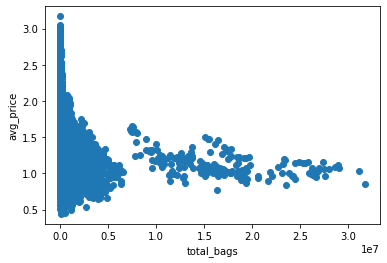

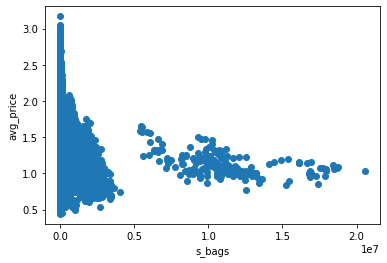

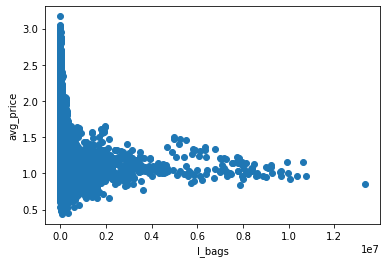

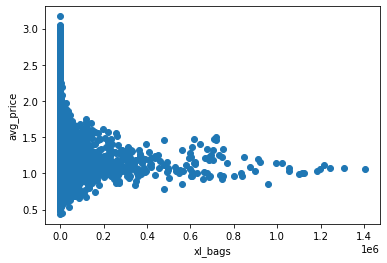

In [10]:
for col in prices_df.columns:
    plt.scatter(prices_df[col], prices_df['avg_price'])
    plt.xlabel(col)
    plt.ylabel('avg_price')
    plt.show()

In [11]:
prices_df.count()

year_month      20410
geography       20410
timeframe       20410
date            20410
type            20410
avg_price       20410
total_volume    20410
4046_units      20410
4225_units      20410
4770_units      20410
total_bags      20410
s_bags          20410
l_bags          20410
xl_bags         20410
dtype: int64

## Creating Bins/Cats 

In [12]:
pre_prices_df = prices_df.copy()

# y 0 1 2 3 values
#0 for val in y if val >= 0.44 and val < 1.14
#1 for val in y if val >= 1.14 and val < 1.37 
#2 for val in y if val >= 1.37 and val < 1.63
#3 for val in y if val >=1.63 

# ratios 4046_units/total_volume  4225_units/total_volume  4770_units/total_volume  
# ratios s_bags/total_bags  l_bags/total_bags  xl_bags/total_bags

# Establish the bins.
price_bins = [0.44, 1.14, 1.37, 1.63, 3.17]
group_names = ["0", "1", "2", "3" ]


# Categorize prices for NB.
prices_df["price_cat"] = pd.cut(prices_df['avg_price'], price_bins, labels=group_names)

prices_df.head()

,year_month,geography,timeframe,date,type,avg_price,total_volume,4046_units,4225_units,4770_units,total_bags,s_bags,l_bags,xl_bags,price_cat
0,1/1/2017,Albany,Weekly,1/2/2017,conventional,1.47,129948.23,4845.77,117027.41,200.36,7874.69,7866.86,7.83,0.00,2
1,1/1/2017,Atlanta,Weekly,1/2/2017,conventional,0.93,547565.88,224073.54,118926.37,337.48,204228.49,111599.58,92628.91,0.00,0
2,1/1/2017,Baltimore/Washington,Weekly,1/2/2017,conventional,1.47,631760.81,54530.42,408952.26,14387.01,153891.12,151345.59,2542.41,3.12,2
3,1/1/2017,Boise,Weekly,1/2/2017,conventional,0.92,104510.11,27845.16,9408.92,11341.75,55914.28,53093.47,2793.61,27.20,0
4,1/1/2017,Boston,Weekly,1/2/2017,conventional,1.29,458830.49,4119.90,371223.34,3933.72,79553.53,79339.78,213.75,0.00,1


## Creating ratios 

In [13]:
prices_df["4046_ratio_units"] = prices_df['4046_units']/prices_df['total_volume']
prices_df["4225_ratio_units"] = prices_df['4225_units']/prices_df['total_volume']
prices_df["4770_ratio_units"] = prices_df['4770_units']/prices_df['total_volume']

prices_df["s_ratio_bags"] = prices_df['s_bags']/prices_df['total_bags']
prices_df["l_ratio_bags"] = prices_df['l_bags']/prices_df['total_bags']
prices_df["xl_ratio_bags"] = prices_df['xl_bags']/prices_df['total_bags']


prices_df.head()

,year_month,geography,timeframe,date,type,avg_price,total_volume,4046_units,4225_units,4770_units,...,s_bags,l_bags,xl_bags,price_cat,4046_ratio_units,4225_ratio_units,4770_ratio_units,s_ratio_bags,l_ratio_bags,xl_ratio_bags
0,1/1/2017,Albany,Weekly,1/2/2017,conventional,1.47,129948.23,4845.77,117027.41,200.36,...,7866.86,7.83,0.00,2,0.037290,0.900569,0.001542,0.999006,0.000994,0.000000
1,1/1/2017,Atlanta,Weekly,1/2/2017,conventional,0.93,547565.88,224073.54,118926.37,337.48,...,111599.58,92628.91,0.00,0,0.409217,0.217191,0.000616,0.546445,0.453555,0.000000
2,1/1/2017,Baltimore/Washington,Weekly,1/2/2017,conventional,1.47,631760.81,54530.42,408952.26,14387.01,...,151345.59,2542.41,3.12,2,0.086315,0.647321,0.022773,0.983459,0.016521,0.000020
3,1/1/2017,Boise,Weekly,1/2/2017,conventional,0.92,104510.11,27845.16,9408.92,11341.75,...,53093.47,2793.61,27.20,0,0.266435,0.090029,0.108523,0.949551,0.049962,0.000486
4,1/1/2017,Boston,Weekly,1/2/2017,conventional,1.29,458830.49,4119.90,371223.34,3933.72,...,79339.78,213.75,0.00,1,0.008979,0.809064,0.008573,0.997313,0.002687,0.000000


## Creating percents 

In [14]:
prices_df["4046_per_units"] = 100*prices_df['4046_units']/prices_df['total_volume']
prices_df["4225_per_units"] = 100*prices_df['4225_units']/prices_df['total_volume']
prices_df["4770_per_units"] = 100*prices_df['4770_units']/prices_df['total_volume']

prices_df["s_per_bags"] = 100*prices_df['s_bags']/prices_df['total_bags']
prices_df["l_per_bags"] = 100*prices_df['l_bags']/prices_df['total_bags']
prices_df["xl_per_bags"] = 100*prices_df['xl_bags']/prices_df['total_bags']

prices_df.head()

,year_month,geography,timeframe,date,type,avg_price,total_volume,4046_units,4225_units,4770_units,...,4770_ratio_units,s_ratio_bags,l_ratio_bags,xl_ratio_bags,4046_per_units,4225_per_units,4770_per_units,s_per_bags,l_per_bags,xl_per_bags
0,1/1/2017,Albany,Weekly,1/2/2017,conventional,1.47,129948.23,4845.77,117027.41,200.36,...,0.001542,0.999006,0.000994,0.000000,3.729000,90.056948,0.154184,99.900568,0.099432,0.000000
1,1/1/2017,Atlanta,Weekly,1/2/2017,conventional,0.93,547565.88,224073.54,118926.37,337.48,...,0.000616,0.546445,0.453555,0.000000,40.921750,21.719098,0.061633,54.644472,45.355528,0.000000
2,1/1/2017,Baltimore/Washington,Weekly,1/2/2017,conventional,1.47,631760.81,54530.42,408952.26,14387.01,...,0.022773,0.983459,0.016521,0.000020,8.631498,64.732135,2.277288,98.345889,1.652084,0.002027
3,1/1/2017,Boise,Weekly,1/2/2017,conventional,0.92,104510.11,27845.16,9408.92,11341.75,...,0.108523,0.949551,0.049962,0.000486,26.643508,9.002880,10.852299,94.955117,4.996237,0.048646
4,1/1/2017,Boston,Weekly,1/2/2017,conventional,1.29,458830.49,4119.90,371223.34,3933.72,...,0.008573,0.997313,0.002687,0.000000,0.897913,80.906424,0.857336,99.731313,0.268687,0.000000


In [15]:
prices_df.count()

year_month          20410
geography           20410
timeframe           20410
date                20410
type                20410
avg_price           20410
total_volume        20410
4046_units          20410
4225_units          20410
4770_units          20410
total_bags          20410
s_bags              20410
l_bags              20410
xl_bags             20410
price_cat           20409
4046_ratio_units    20410
4225_ratio_units    20410
4770_ratio_units    20410
s_ratio_bags        20410
l_ratio_bags        20410
xl_ratio_bags       20410
4046_per_units      20410
4225_per_units      20410
4770_per_units      20410
s_per_bags          20410
l_per_bags          20410
xl_per_bags         20410
dtype: int64

In [16]:
prices_df = prices_df.dropna()
prices_df.count()

year_month          20409
geography           20409
timeframe           20409
date                20409
type                20409
avg_price           20409
total_volume        20409
4046_units          20409
4225_units          20409
4770_units          20409
total_bags          20409
s_bags              20409
l_bags              20409
xl_bags             20409
price_cat           20409
4046_ratio_units    20409
4225_ratio_units    20409
4770_ratio_units    20409
s_ratio_bags        20409
l_ratio_bags        20409
xl_ratio_bags       20409
4046_per_units      20409
4225_per_units      20409
4770_per_units      20409
s_per_bags          20409
l_per_bags          20409
xl_per_bags         20409
dtype: int64

In [17]:
prices_ml_df = pd.get_dummies(data=prices_df, columns=['year_month', 'geography', 'timeframe', 'date', 'type'])


In [18]:
prices_ml_df.columns

Index(['avg_price', 'total_volume', '4046_units', '4225_units', '4770_units',
       'total_bags', 's_bags', 'l_bags', 'xl_bags', 'price_cat',
       ...
       'date_9/24/2017', 'date_9/29/2019', 'date_9/3/2017', 'date_9/30/2018',
       'date_9/6/2020', 'date_9/8/2019', 'date_9/9/2018', 'type_conventional',
       'type_conventional ', 'type_organic'],
      dtype='object', length=314)

In [19]:
print(prices_ml_df.shape)

(20409, 314)


In [20]:
prices_ml_df.head()

,avg_price,total_volume,4046_units,4225_units,4770_units,total_bags,s_bags,l_bags,xl_bags,price_cat,...,date_9/24/2017,date_9/29/2019,date_9/3/2017,date_9/30/2018,date_9/6/2020,date_9/8/2019,date_9/9/2018,type_conventional,type_conventional,type_organic
0,1.47,129948.23,4845.77,117027.41,200.36,7874.69,7866.86,7.83,0.00,2,...,0,0,0,0,0,0,0,1,0,0
1,0.93,547565.88,224073.54,118926.37,337.48,204228.49,111599.58,92628.91,0.00,0,...,0,0,0,0,0,0,0,1,0,0
2,1.47,631760.81,54530.42,408952.26,14387.01,153891.12,151345.59,2542.41,3.12,2,...,0,0,0,0,0,0,0,1,0,0
3,0.92,104510.11,27845.16,9408.92,11341.75,55914.28,53093.47,2793.61,27.20,0,...,0,0,0,0,0,0,0,1,0,0
4,1.29,458830.49,4119.90,371223.34,3933.72,79553.53,79339.78,213.75,0.00,1,...,0,0,0,0,0,0,0,1,0,0


## Using original values 

In [21]:
#y = prices_ml_df['price_cat']
#X = prices_ml_df.drop(columns=['avg_price', 'total_volume', '4046_ratio_units', '4225_ratio_units', '4770_ratio_units', 
#                               '4046_per_units', '4225_per_units', '4770_per_units', 
#                               'total_bags', 's_ratio_bags', 'l_ratio_bags', 'xl_ratio_bags', 
#                               's_per_bags', 'l_per_bags', 'xl_per_bags', 'price_cat'], axis=1)

## Using ratios 

In [22]:
#prices_ml_df = prices_ml_df.reset_index()
#Get X and y; features and target
#y = prices_ml_df['price_cat']
#X = prices_ml_df.drop(columns=['avg_price', 'total_volume', '4046_units', '4225_units', '4770_units', 
#                               '4046_per_units', '4225_per_units', '4770_per_units', 
#                               'total_bags', 's_bags', 'l_bags', 'xl_bags', 
#                               's_per_bags', 'l_per_bags', 'xl_per_bags', 'price_cat'], axis=1)

## Using Percents 

In [23]:
#y = prices_ml_df['price_cat']
#X = prices_ml_df.drop(columns=['avg_price', 'total_volume', '4046_units', '4225_units', '4770_units', 
#                               '4046_ratio_units', '4225_ratio_units', '4770_ratio_units', 
#                               'total_bags', 's_bags', 'l_bags', 'xl_bags', 
#                               's_ratio_bags', 'l_ratio_bags', 'xl_ratio_bags', 'price_cat'], axis=1)

## Using ratios and percents 

In [24]:
#y = prices_ml_df['price_cat']
#X = prices_ml_df.drop(columns=['avg_price', 'total_volume', '4046_units', '4225_units', '4770_units', 
#                               'total_bags', 's_bags', 'l_bags', 'xl_bags', 'price_cat'], axis=1)

In [25]:
#y
#y.describe()

In [26]:
#X.count()

In [27]:
#X

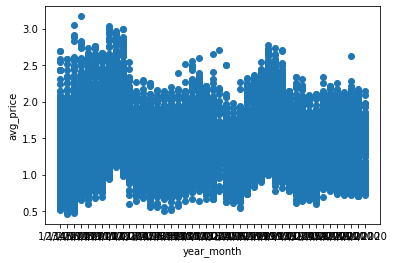

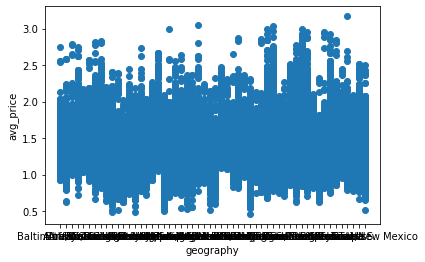

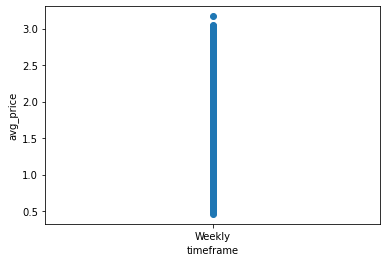

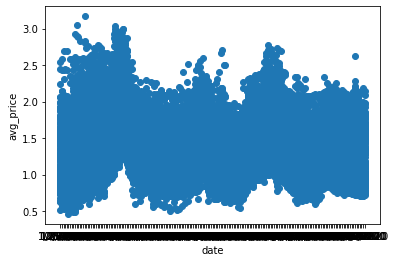

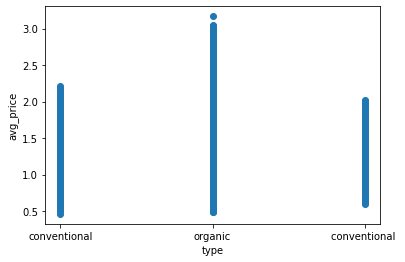

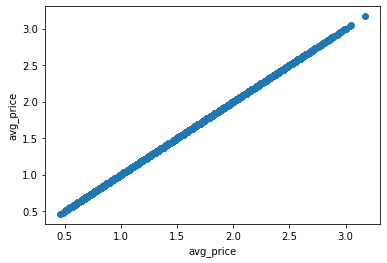

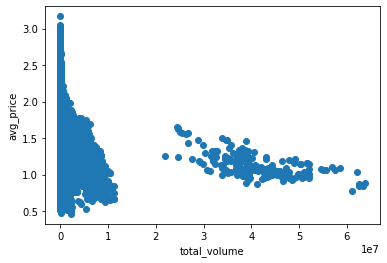

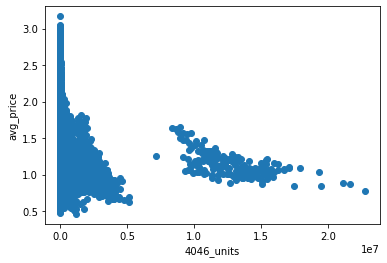

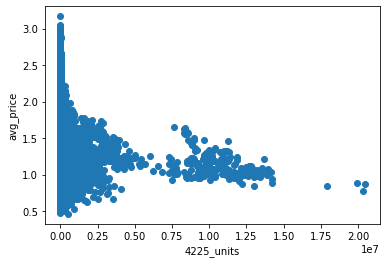

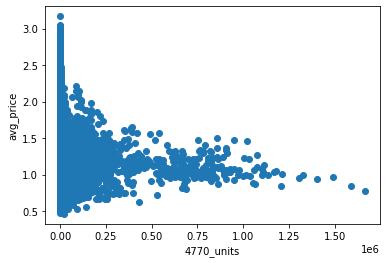

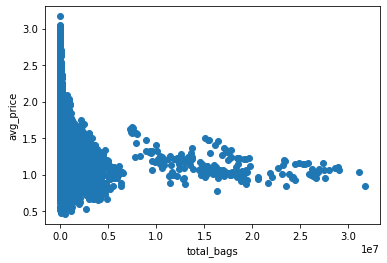

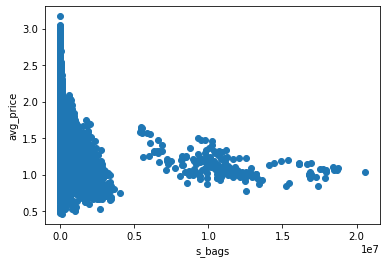

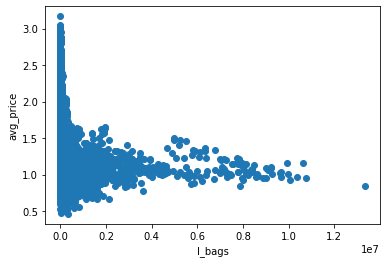

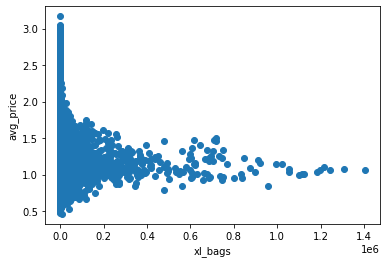

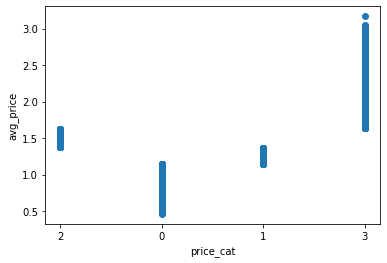

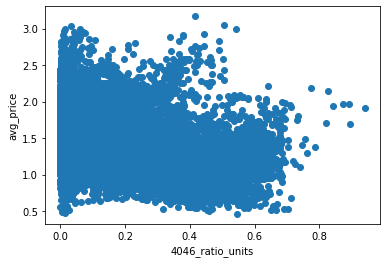

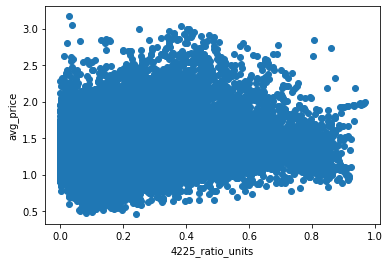

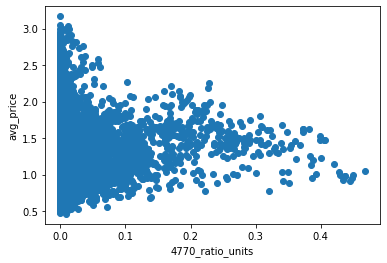

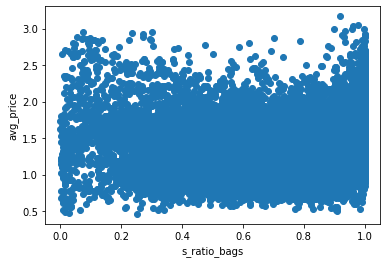

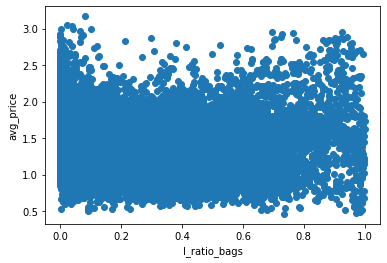

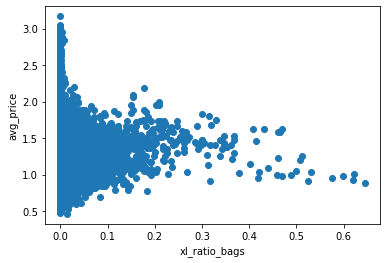

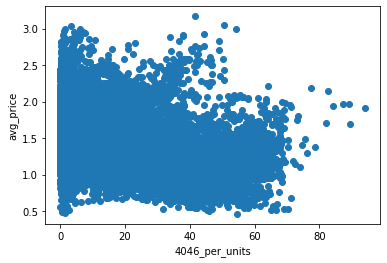

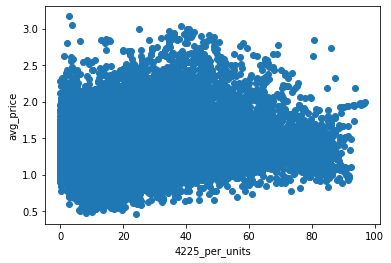

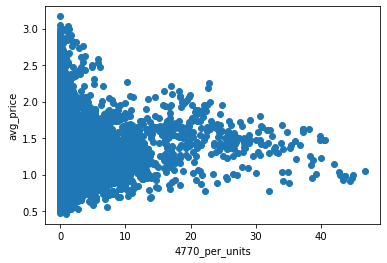

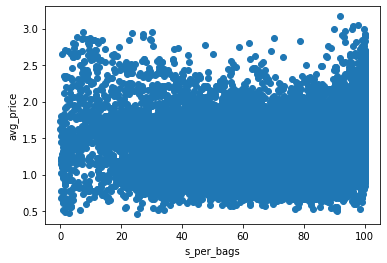

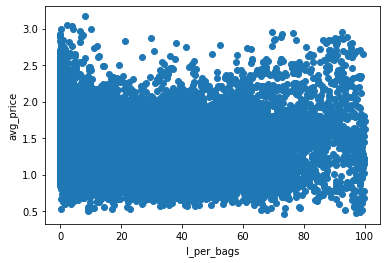

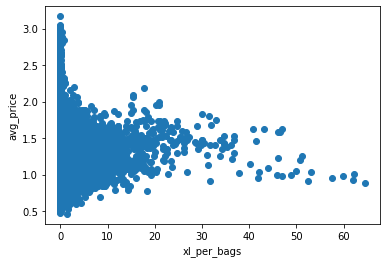

In [28]:
#prices_ml_df.plot()
#plt.show()

for col in prices_df.columns:
    plt.scatter(prices_df[col], prices_df['avg_price'])
    plt.xlabel(col)
    plt.ylabel('avg_price')
    plt.show()

In [29]:
#np.any(np.isnan(X))


In [30]:
#np.all(np.isfinite(X))

In [31]:
#X

In [42]:
prices_orig_df = prices_ml_df.drop(columns=['avg_price', 'total_volume', '4046_ratio_units', '4225_ratio_units', '4770_ratio_units', 
                               '4046_per_units', '4225_per_units', '4770_per_units', 
                               'total_bags', 's_ratio_bags', 'l_ratio_bags', 'xl_ratio_bags', 
                               's_per_bags', 'l_per_bags', 'xl_per_bags'], axis=1)

prices_rat_df = prices_ml_df.drop(columns=['avg_price', 'total_volume', '4046_units', '4225_units', '4770_units', 
                               '4046_per_units', '4225_per_units', '4770_per_units', 
                               'total_bags', 's_bags', 'l_bags', 'xl_bags', 
                               's_per_bags', 'l_per_bags', 'xl_per_bags'], axis=1)

prices_per_df = prices_ml_df.drop(columns=['avg_price', 'total_volume', '4046_units', '4225_units', '4770_units', 
                               '4046_ratio_units', '4225_ratio_units', '4770_ratio_units', 
                               'total_bags', 's_bags', 'l_bags', 'xl_bags', 
                               's_ratio_bags', 'l_ratio_bags', 'xl_ratio_bags'], axis=1)

prices_per_rat_df = prices_ml_df.drop(columns=['avg_price', 'total_volume', '4046_units', '4225_units', '4770_units', 
                               'total_bags', 's_bags', 'l_bags', 'xl_bags'], axis=1)



prices_ap_orig_df = prices_ml_df.drop(columns=['price_cat', 'total_volume', '4046_ratio_units', '4225_ratio_units', '4770_ratio_units', 
                               '4046_per_units', '4225_per_units', '4770_per_units', 
                               'total_bags', 's_ratio_bags', 'l_ratio_bags', 'xl_ratio_bags', 
                               's_per_bags', 'l_per_bags', 'xl_per_bags'], axis=1)

prices_ap_rat_df = prices_ml_df.drop(columns=['price_cat', 'total_volume', '4046_units', '4225_units', '4770_units', 
                               '4046_per_units', '4225_per_units', '4770_per_units', 
                               'total_bags', 's_bags', 'l_bags', 'xl_bags', 
                               's_per_bags', 'l_per_bags', 'xl_per_bags'], axis=1)

prices_ap_per_df = prices_ml_df.drop(columns=['price_cat', 'total_volume', '4046_units', '4225_units', '4770_units', 
                               '4046_ratio_units', '4225_ratio_units', '4770_ratio_units', 
                               'total_bags', 's_bags', 'l_bags', 'xl_bags', 
                               's_ratio_bags', 'l_ratio_bags', 'xl_ratio_bags'], axis=1)

prices_ap_per_rat_df = prices_ml_df.drop(columns=['price_cat', 'total_volume', '4046_units', '4225_units', '4770_units', 
                               'total_bags', 's_bags', 'l_bags', 'xl_bags'], axis=1)



# NaiveBayes Model

In [40]:
def modelNBAccrcy(X, y):
    #Import Gaussian Naive Bayes model
    from sklearn.naive_bayes import GaussianNB
    
    # Break data down into a training set and a testing set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=78)
    y_train = pd.to_numeric(y_train)
    y_test = pd.to_numeric(y_test)
    
    #Create a Gaussian Classifier
    gnb = GaussianNB()   
    
    #Train the model using the training sets
    gnb.fit(X_train, y_train)
    
    #Predict the response for test dataset
    y_pred = gnb.predict(X_test)
    y_pred = pd.to_numeric(y_pred)
    print(y_pred)
    
    #Import scikit-learn metrics module for accuracy calculation
    from sklearn import metrics
    
    # Model Accuracy, how often is the classifier correct?
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    

In [43]:
# original
y = prices_orig_df['price_cat']
X = prices_orig_df.drop(columns=['price_cat'], axis=1)

modelNBAccrcy(X, y)

[2 3 3 ... 3 2 3]
Accuracy: 0.29772987097827863


In [44]:
# ratios
y = prices_rat_df['price_cat']
X = prices_rat_df.drop(columns=['price_cat'], axis=1)

modelNBAccrcy(X, y)

[0 1 0 ... 0 3 3]
Accuracy: 0.41139964069900375


In [45]:
# percents
y = prices_per_df['price_cat']
X = prices_per_df.drop(columns=['price_cat'], axis=1)

modelNBAccrcy(X, y)

[0 1 0 ... 0 3 3]
Accuracy: 0.42740486689531276


In [46]:
# ratios and percents
y = prices_per_rat_df['price_cat']
X = prices_per_rat_df.drop(columns=['price_cat'], axis=1)

modelNBAccrcy(X, y)

[0 1 0 ... 0 3 2]
Accuracy: 0.4290380532418749


### Accuracy when percents are used  Accuracy: 0.42740486689531276

### Accuracy when percents are used  Accuracy: 0.4290380532418749

###  Accuracy when original values are used Accuracy: 0.29772987097827863

###  Accuracy when ratios are used Accuracy: 0.41139964069900375

# Linear Regression Model

In [47]:
prices_df.head()

,year_month,geography,timeframe,date,type,avg_price,total_volume,4046_units,4225_units,4770_units,...,4770_ratio_units,s_ratio_bags,l_ratio_bags,xl_ratio_bags,4046_per_units,4225_per_units,4770_per_units,s_per_bags,l_per_bags,xl_per_bags
0,1/1/2017,Albany,Weekly,1/2/2017,conventional,1.47,129948.23,4845.77,117027.41,200.36,...,0.001542,0.999006,0.000994,0.000000,3.729000,90.056948,0.154184,99.900568,0.099432,0.000000
1,1/1/2017,Atlanta,Weekly,1/2/2017,conventional,0.93,547565.88,224073.54,118926.37,337.48,...,0.000616,0.546445,0.453555,0.000000,40.921750,21.719098,0.061633,54.644472,45.355528,0.000000
2,1/1/2017,Baltimore/Washington,Weekly,1/2/2017,conventional,1.47,631760.81,54530.42,408952.26,14387.01,...,0.022773,0.983459,0.016521,0.000020,8.631498,64.732135,2.277288,98.345889,1.652084,0.002027
3,1/1/2017,Boise,Weekly,1/2/2017,conventional,0.92,104510.11,27845.16,9408.92,11341.75,...,0.108523,0.949551,0.049962,0.000486,26.643508,9.002880,10.852299,94.955117,4.996237,0.048646
4,1/1/2017,Boston,Weekly,1/2/2017,conventional,1.29,458830.49,4119.90,371223.34,3933.72,...,0.008573,0.997313,0.002687,0.000000,0.897913,80.906424,0.857336,99.731313,0.268687,0.000000


In [48]:
prices_df.count()

year_month          20409
geography           20409
timeframe           20409
date                20409
type                20409
avg_price           20409
total_volume        20409
4046_units          20409
4225_units          20409
4770_units          20409
total_bags          20409
s_bags              20409
l_bags              20409
xl_bags             20409
price_cat           20409
4046_ratio_units    20409
4225_ratio_units    20409
4770_ratio_units    20409
s_ratio_bags        20409
l_ratio_bags        20409
xl_ratio_bags       20409
4046_per_units      20409
4225_per_units      20409
4770_per_units      20409
s_per_bags          20409
l_per_bags          20409
xl_per_bags         20409
dtype: int64

In [49]:
prices_ml_df.head()

,avg_price,total_volume,4046_units,4225_units,4770_units,total_bags,s_bags,l_bags,xl_bags,price_cat,...,date_9/24/2017,date_9/29/2019,date_9/3/2017,date_9/30/2018,date_9/6/2020,date_9/8/2019,date_9/9/2018,type_conventional,type_conventional,type_organic
0,1.47,129948.23,4845.77,117027.41,200.36,7874.69,7866.86,7.83,0.00,2,...,0,0,0,0,0,0,0,1,0,0
1,0.93,547565.88,224073.54,118926.37,337.48,204228.49,111599.58,92628.91,0.00,0,...,0,0,0,0,0,0,0,1,0,0
2,1.47,631760.81,54530.42,408952.26,14387.01,153891.12,151345.59,2542.41,3.12,2,...,0,0,0,0,0,0,0,1,0,0
3,0.92,104510.11,27845.16,9408.92,11341.75,55914.28,53093.47,2793.61,27.20,0,...,0,0,0,0,0,0,0,1,0,0
4,1.29,458830.49,4119.90,371223.34,3933.72,79553.53,79339.78,213.75,0.00,1,...,0,0,0,0,0,0,0,1,0,0


In [50]:
prices_ml_df.count()

avg_price             20409
total_volume          20409
4046_units            20409
4225_units            20409
4770_units            20409
                      ...  
date_9/8/2019         20409
date_9/9/2018         20409
type_conventional     20409
type_conventional     20409
type_organic          20409
Length: 314, dtype: int64

In [52]:
def modelLinearReg(X, y):
    # reshaping the values for X
    X = X.values.reshape(-1, 1)
    
    # import linear regression
    from sklearn.linear_model import LinearRegression
    
    # create model
    model = LinearRegression()
    
    # fit model
    model.fit(X, y)
    
    # predict
    y_pred = model.predict(X)
    
    # plot
    plt.scatter(X, y)
    plt.plot(X, y_pred, color='red')
    plt.xlabel(col)
    plt.ylabel('avg_price')
    plt.show()
    
    # model coeffs
    print(model.coef_)
    print(model.intercept_)
    

In [53]:
prices_df.dtypes

year_month            object
geography             object
timeframe             object
date                  object
type                  object
avg_price            float64
total_volume         float64
4046_units           float64
4225_units           float64
4770_units           float64
total_bags           float64
s_bags               float64
l_bags               float64
xl_bags              float64
price_cat           category
4046_ratio_units     float64
4225_ratio_units     float64
4770_ratio_units     float64
s_ratio_bags         float64
l_ratio_bags         float64
xl_ratio_bags        float64
4046_per_units       float64
4225_per_units       float64
4770_per_units       float64
s_per_bags           float64
l_per_bags           float64
xl_per_bags          float64
dtype: object

In [54]:
prices_ml_df.dtypes

avg_price             float64
total_volume          float64
4046_units            float64
4225_units            float64
4770_units            float64
                       ...   
date_9/8/2019           uint8
date_9/9/2018           uint8
type_conventional       uint8
type_conventional       uint8
type_organic            uint8
Length: 314, dtype: object

In [55]:

for col in prices_df.columns:
    if type(prices_df[col][0]) == int or float:
        print(col + " " + str(type(prices_df[col])))

year_month <class 'pandas.core.series.Series'>
geography <class 'pandas.core.series.Series'>
timeframe <class 'pandas.core.series.Series'>
date <class 'pandas.core.series.Series'>
type <class 'pandas.core.series.Series'>
avg_price <class 'pandas.core.series.Series'>
total_volume <class 'pandas.core.series.Series'>
4046_units <class 'pandas.core.series.Series'>
4225_units <class 'pandas.core.series.Series'>
4770_units <class 'pandas.core.series.Series'>
total_bags <class 'pandas.core.series.Series'>
s_bags <class 'pandas.core.series.Series'>
l_bags <class 'pandas.core.series.Series'>
xl_bags <class 'pandas.core.series.Series'>
price_cat <class 'pandas.core.series.Series'>
4046_ratio_units <class 'pandas.core.series.Series'>
4225_ratio_units <class 'pandas.core.series.Series'>
4770_ratio_units <class 'pandas.core.series.Series'>
s_ratio_bags <class 'pandas.core.series.Series'>
l_ratio_bags <class 'pandas.core.series.Series'>
xl_ratio_bags <class 'pandas.core.series.Series'>
4046_per_unit

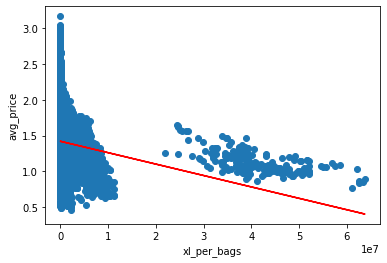

[-1.59889772e-08]
1.420603927860571


In [56]:
#for col in prices_df.columns:
#    if type(prices_df[col][0]) == int or float:
#        modelLinearReg(prices_df[col], prices_df['avg_price'])

modelLinearReg(prices_df['total_volume'], prices_df['avg_price'])

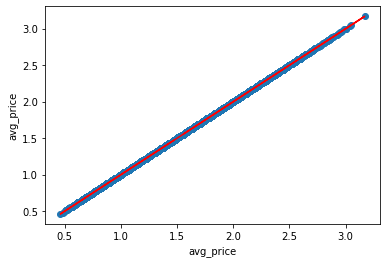

[1.]
3.175237850427948e-14


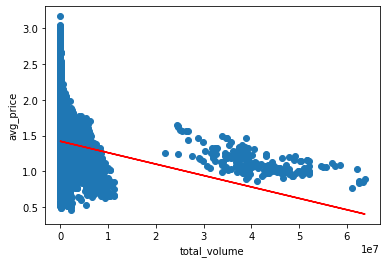

[-1.59889772e-08]
1.420603927860571


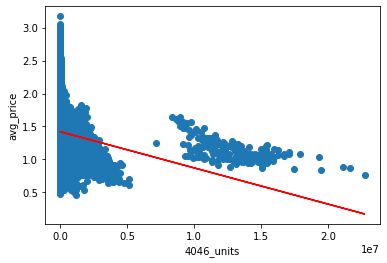

[-5.4877548e-08]
1.421040769737565


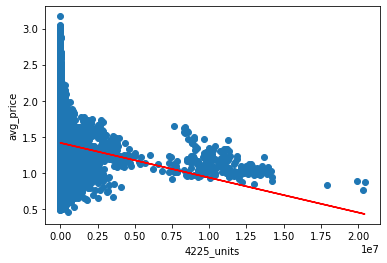

[-4.82124994e-08]
1.417009916006591


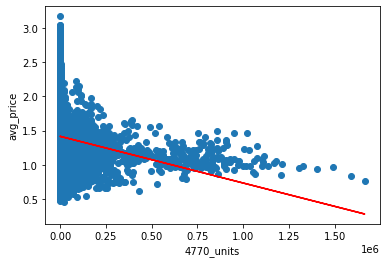

[-6.81223946e-07]
1.4168198893516262


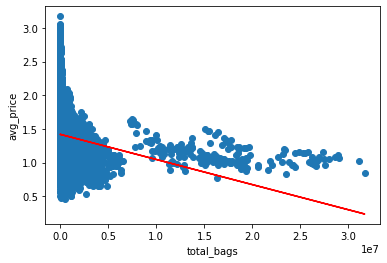

[-3.72560498e-08]
1.4203597694820727


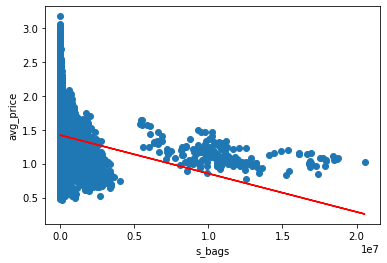

[-5.64747789e-08]
1.420556320609776


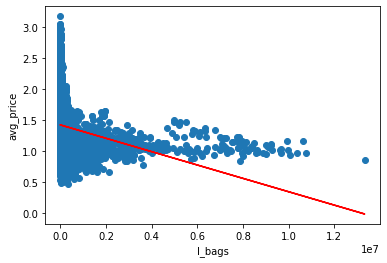

[-1.07856823e-07]
1.4186518749519903


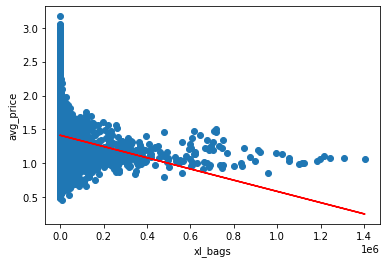

[-8.28415197e-07]
1.412366014169717


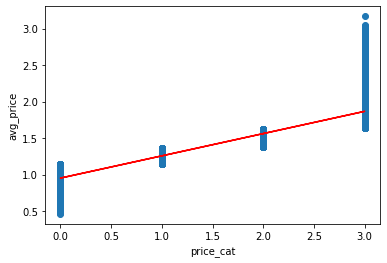

[0.30522976]
0.9521080371507129


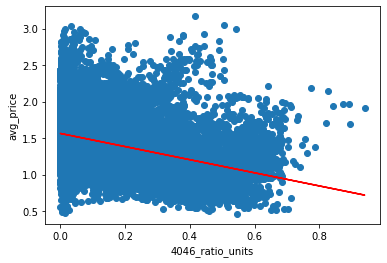

[-0.89916463]
1.564517236524175


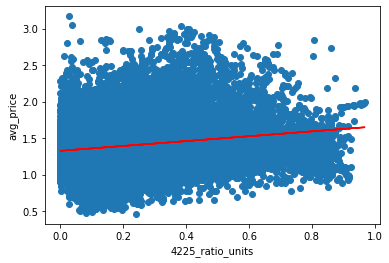

[0.33317028]
1.326325925744917


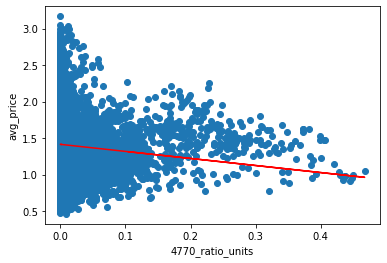

[-0.9679492]
1.415140214098719


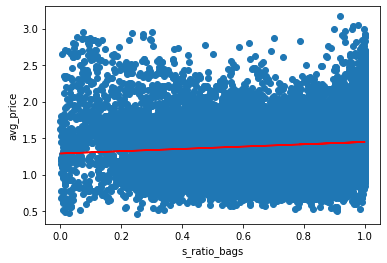

[0.15798104]
1.2896807775349601


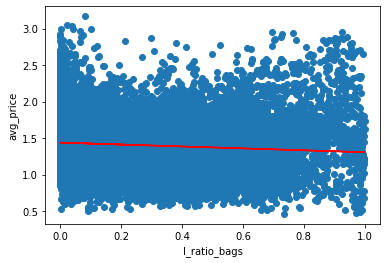

[-0.13205443]
1.4390027477575482


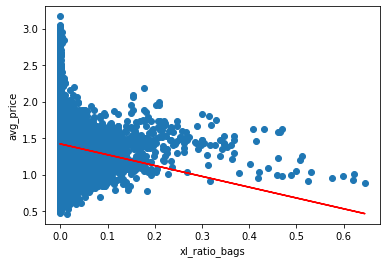

[-1.48134797]
1.4207348953792516


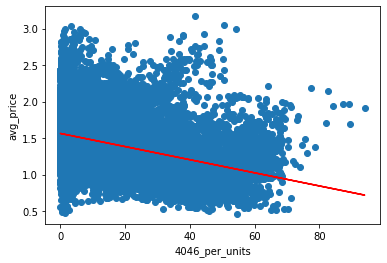

[-0.00899165]
1.5645172365241746


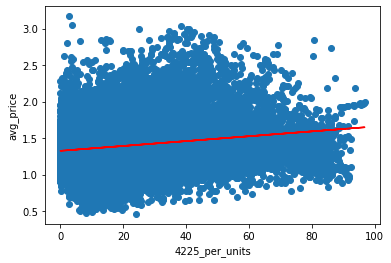

[0.0033317]
1.326325925744917


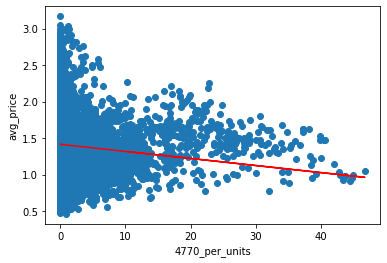

[-0.00967949]
1.4151402140987188


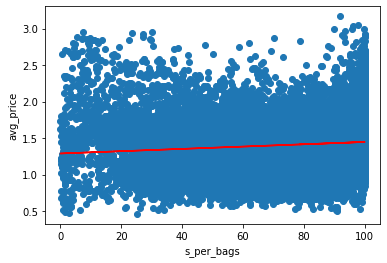

[0.00157981]
1.2896807775349597


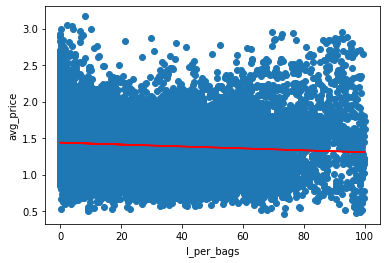

[-0.00132054]
1.4390027477575484


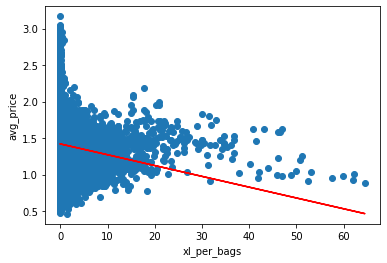

[-0.01481348]
1.420734895379251


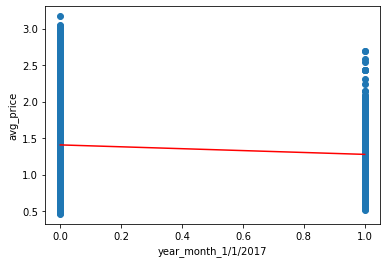

[-0.12993067]
1.4074306708943567


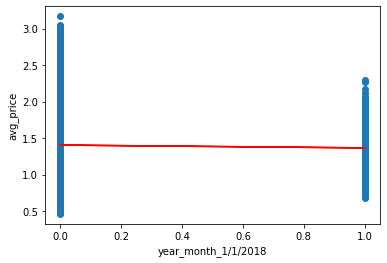

[-0.03835965]
1.4050078010971865


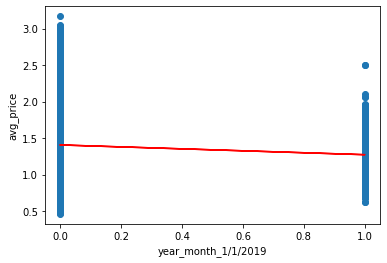

[-0.13355595]
1.4068198428192418


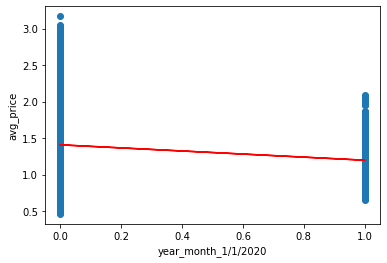

[-0.21091093]
1.4084572258096808


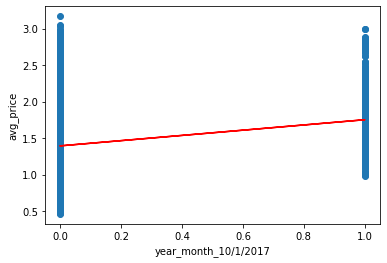

[0.35792182]
1.3945226231818435


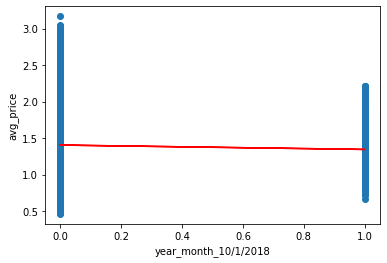

[-0.06007937]
1.4052645542373727


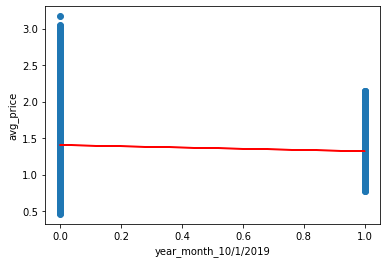

[-0.08521796]
1.4057966661660908


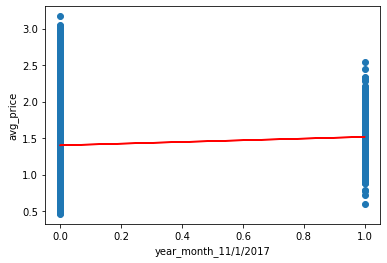

[0.11574889]
1.401542774190319


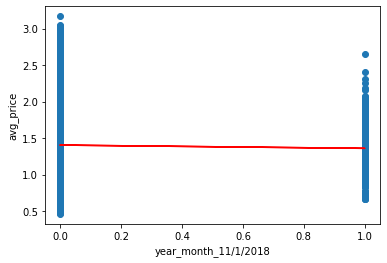

[-0.04480229]
1.4049411823597135


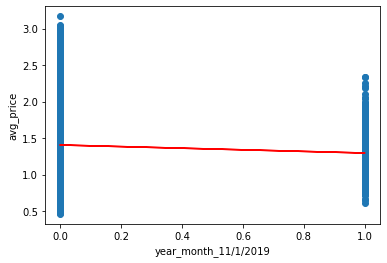

[-0.11002547]
1.4063217700355408


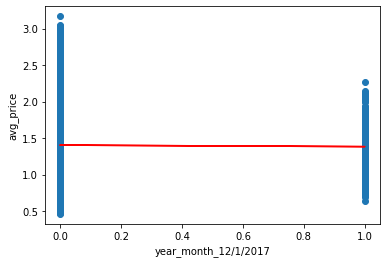

[-0.02049141]
1.404426590579166


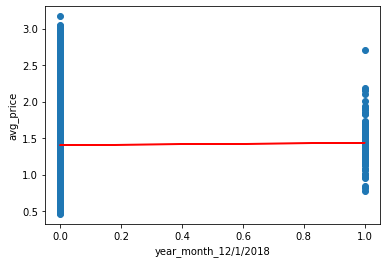

[0.03173062]
1.4038249347322793


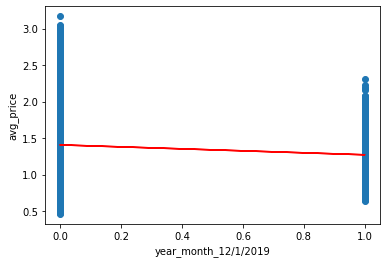

[-0.13552308]
1.407578640092606


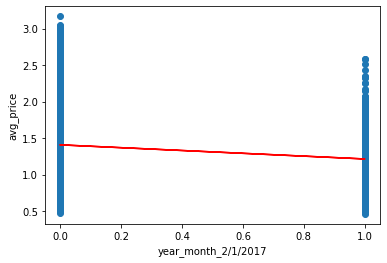

[-0.19329263]
1.4080842969414822


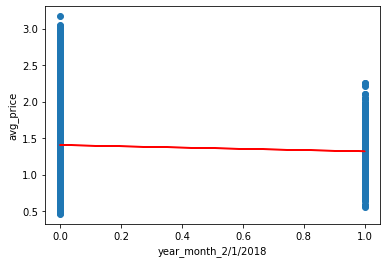

[-0.08713351]
1.4058372127947139


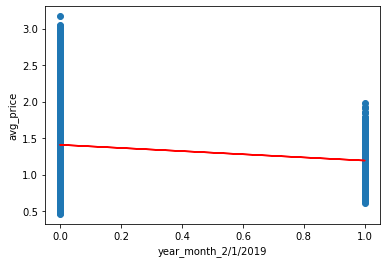

[-0.21568797]
1.408558342093407


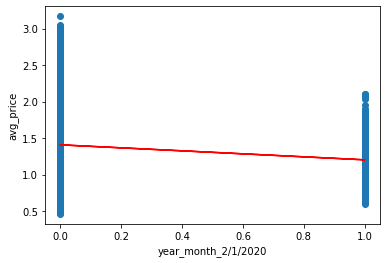

[-0.20544807]
1.4083415928317564


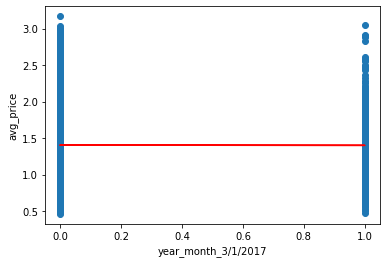

[-0.00289387]
1.4040539593552908


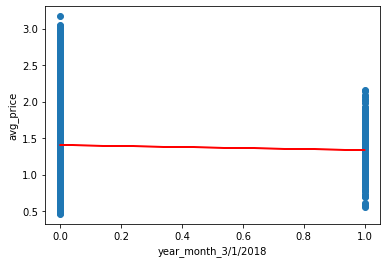

[-0.06899494]
1.4054532712619512


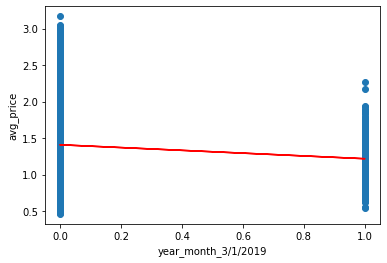

[-0.19089559]
1.4090437364739021


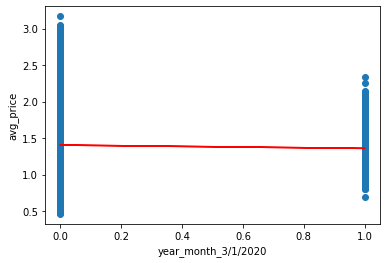

[-0.04549283]
1.4051965373194422


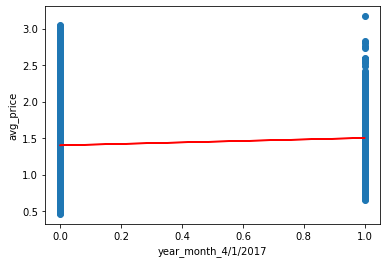

[0.10129851]
1.401312597513716


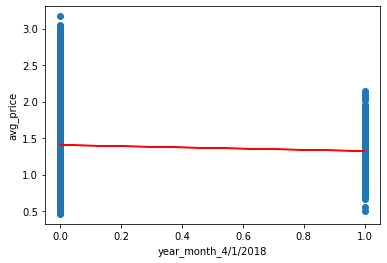

[-0.08237613]
1.4061724294126527


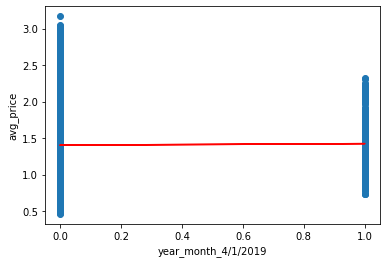

[0.02120129]
1.40354407568704


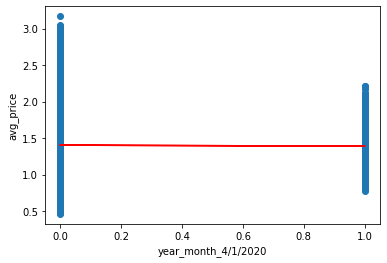

[-0.01455558]
1.4043009460880012


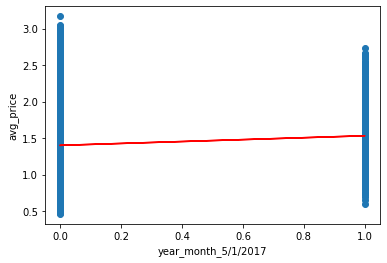

[0.1313807]
1.4012118936777298


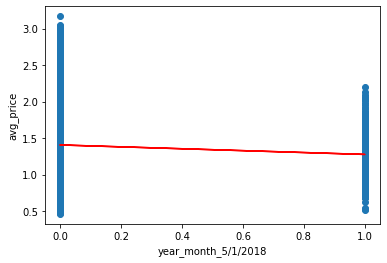

[-0.1299377]
1.4067432547429544


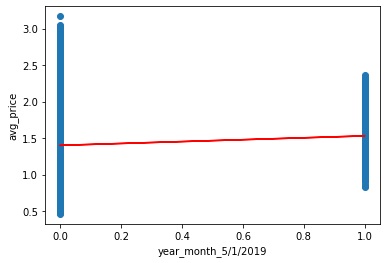

[0.12967799]
1.4012479351253946


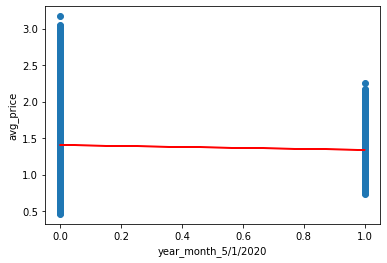

[-0.06639781]
1.4057496602747999


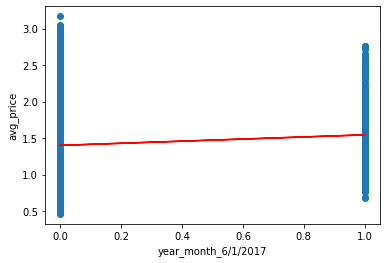

[0.14444585]
1.400949496971821


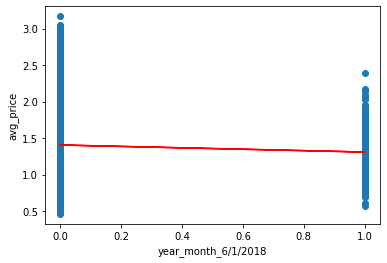

[-0.09656935]
1.4060369424838564


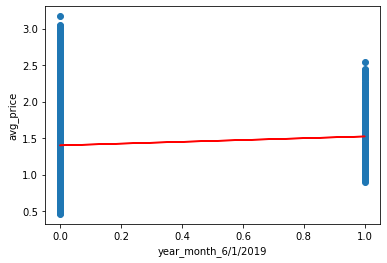

[0.12277414]
1.4007443756605777


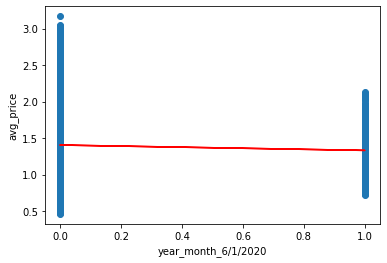

[-0.07355914]
1.4055498823647194


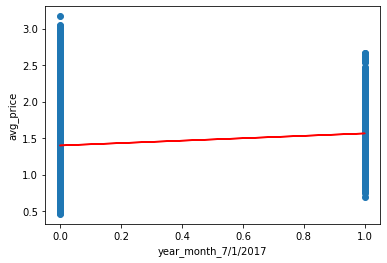

[0.16530692]
1.399619004479341


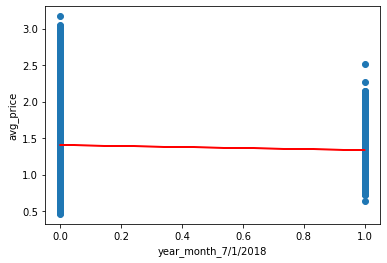

[-0.06972663]
1.4058377371785193


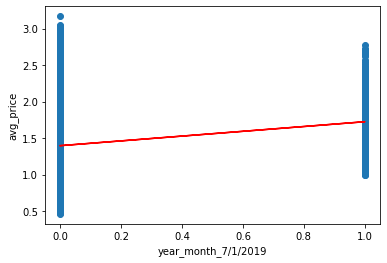

[0.32804349]
1.3970491064724442


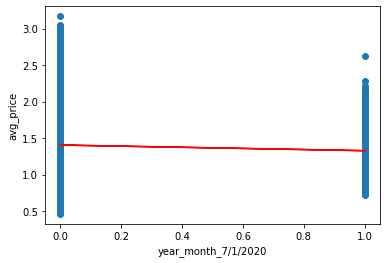

[-0.07746118]
1.4056324773489512


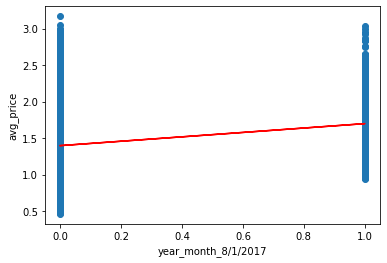

[0.30134408]
1.3976142563948548


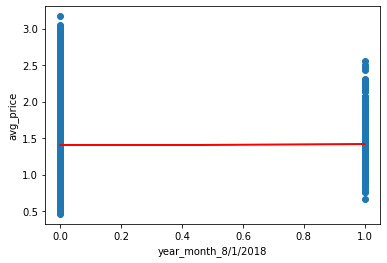

[0.01259316]
1.4037262852280123


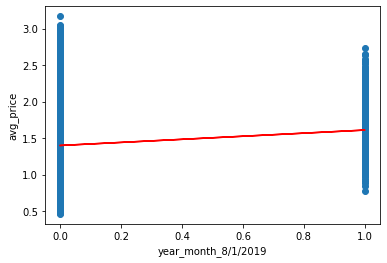

[0.21117149]
1.3995229513941037


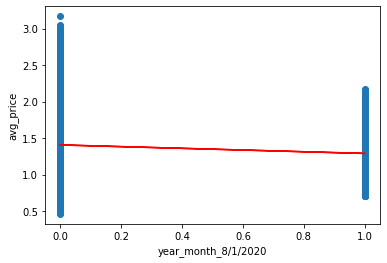

[-0.11667247]
1.4070798731692586


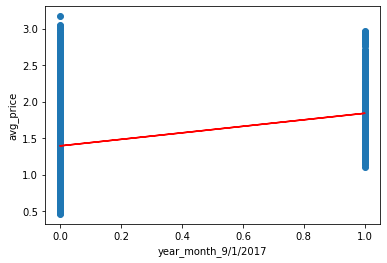

[0.44640535]
1.3945437252840778


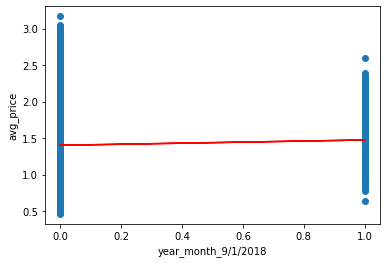

[0.07299405]
1.4020615028436259


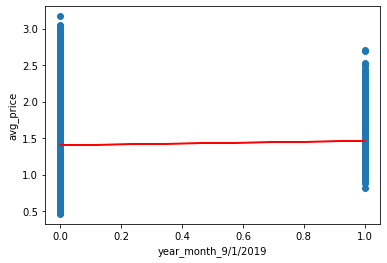

[0.05994509]
1.4024067643062061


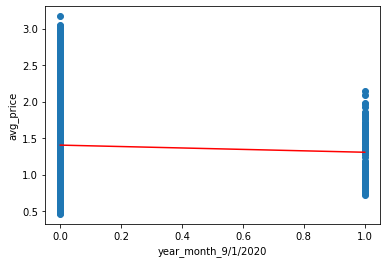

[-0.09784395]
1.4045106152406286


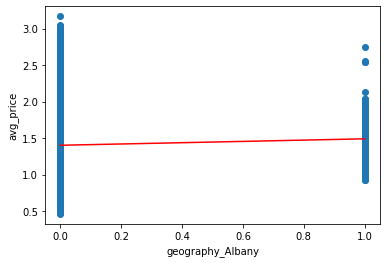

[0.08857357]
1.4023523538515303


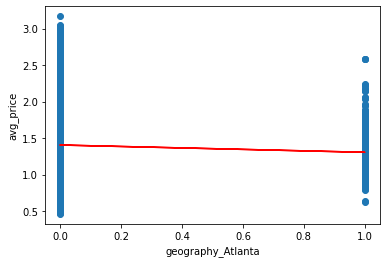

[-0.09972884]
1.4058399480804753


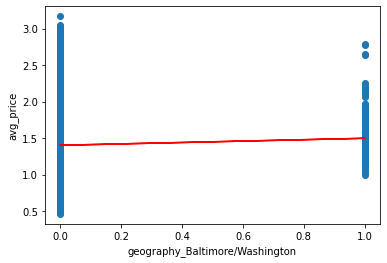

[0.09595904]
1.4022155658728972


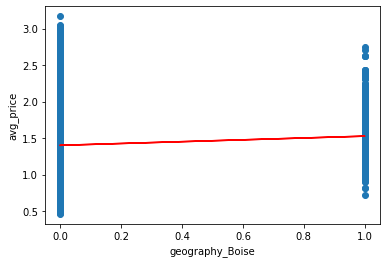

[0.12582435]
1.401662423243972


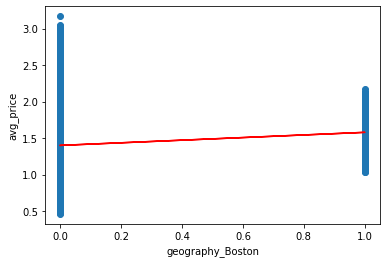

[0.17895118]
1.4006784484049726


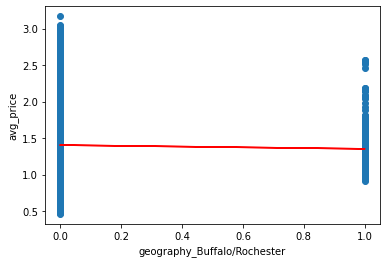

[-0.05139986]
1.4049448355049674


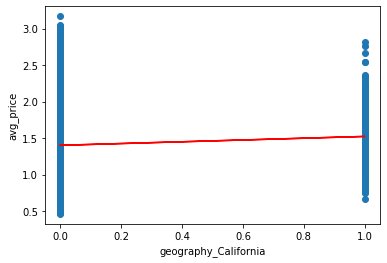

[0.12186207]
1.4017358094952825


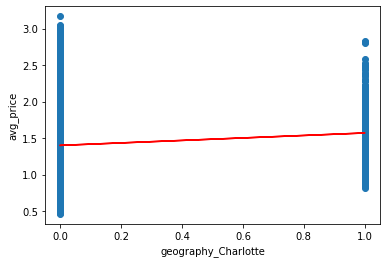

[0.17002932]
1.400843692276971


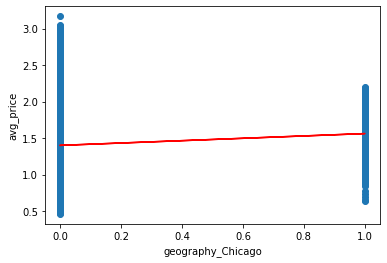

[0.16159264]
1.4009999500773802


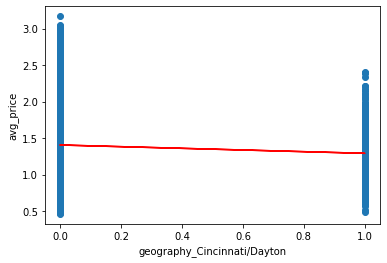

[-0.11411135]
1.4061007388178914


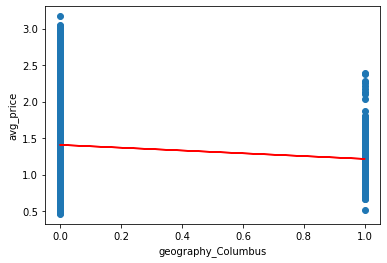

[-0.19166979]
1.4075428086465978


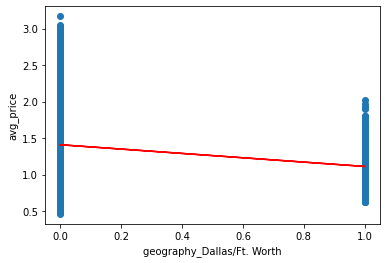

[-0.29741133]
1.4095012730268084


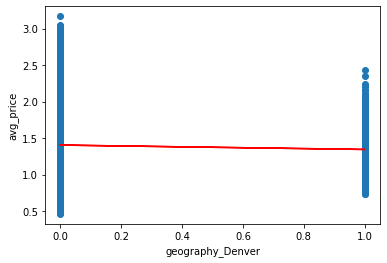

[-0.0602139]
1.4051080824721682


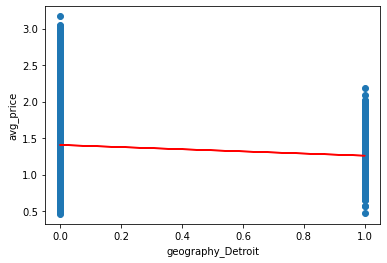

[-0.14684487]
1.4067125954770106


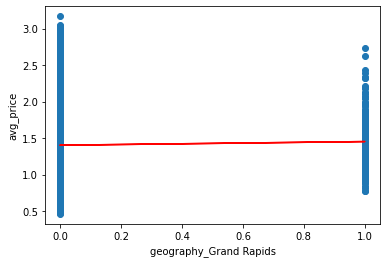

[0.05016376]
1.4030637511856623


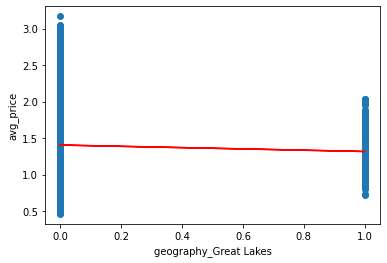

[-0.08854282]
1.405632769207728


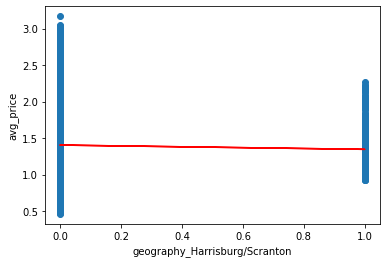

[-0.05865056]
1.4050791273526035


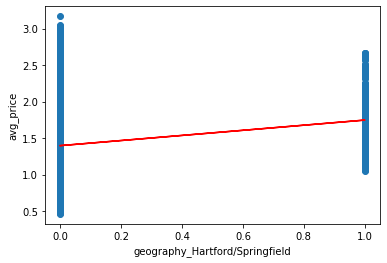

[0.35013764]
1.3975078628126407


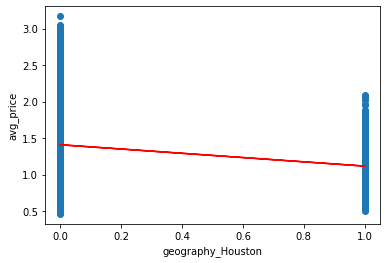

[-0.2924787]
1.4094099146323198


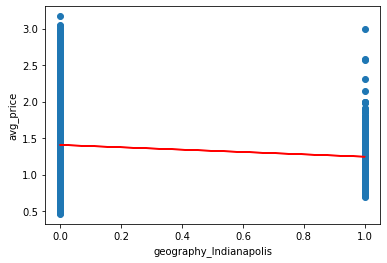

[-0.16115758]
1.406977684588887


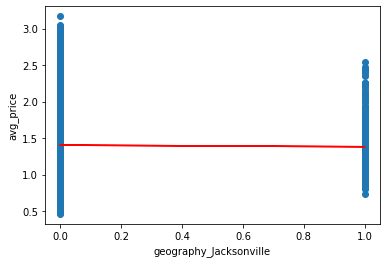

[-0.02204668]
1.4044011781738306


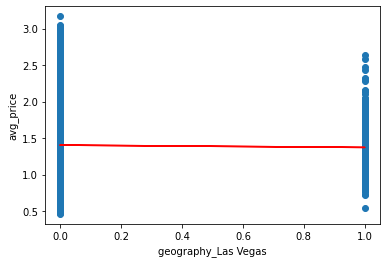

[-0.03175021]
1.4045808996056113


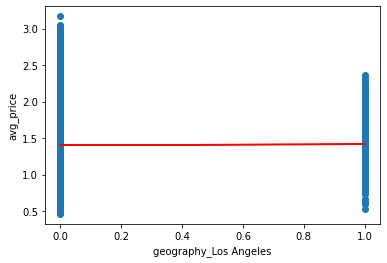

[0.0130208]
1.403751684888423


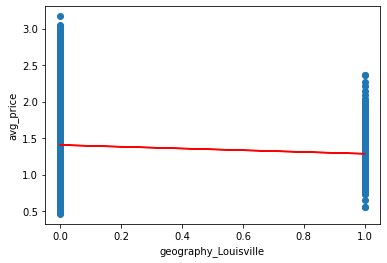

[-0.11991757]
1.406213868503819


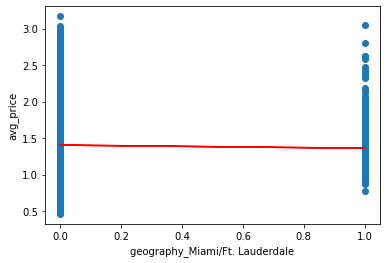

[-0.04339445]
1.4047965653237482


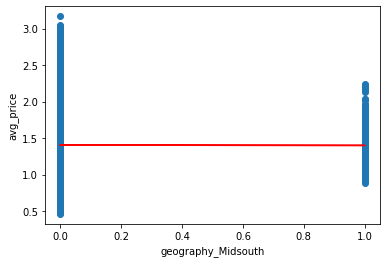

[-0.00371779]
1.4040617043582448


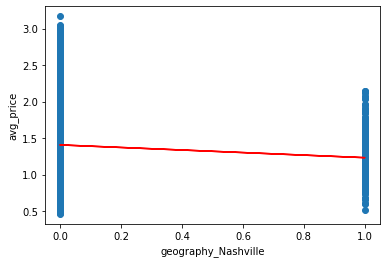

[-0.17471557]
1.407228795367181


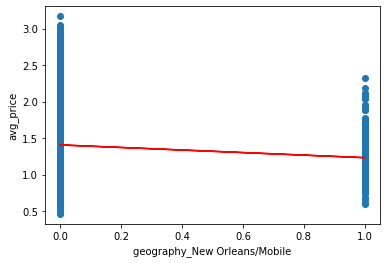

[-0.17490425]
1.4072322899505765


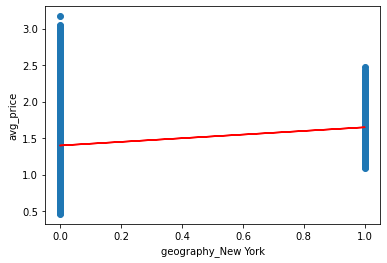

[0.24959828]
1.399369976536369


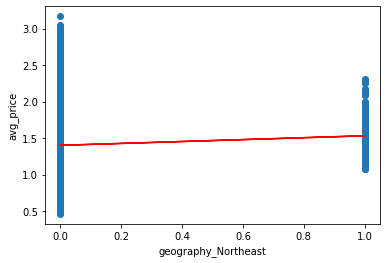

[0.13089175]
1.4015685687184865


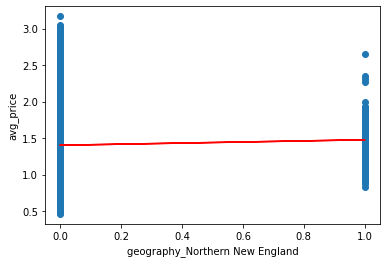

[0.07490777]
1.4026054615346215


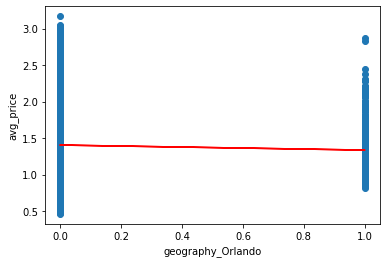

[-0.0687584]
1.405266337177375


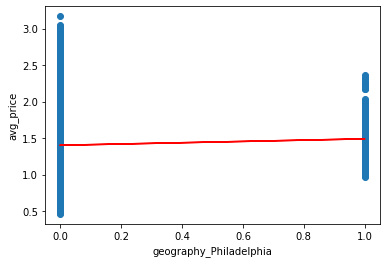

[0.0880884]
1.4023613399231194


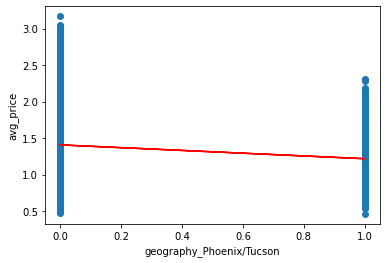

[-0.18940564]
1.4075008736458487


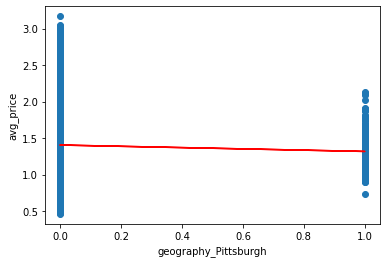

[-0.0877881]
1.405618790874145


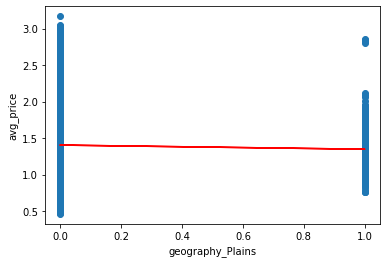

[-0.05681767]
1.4050451799710448


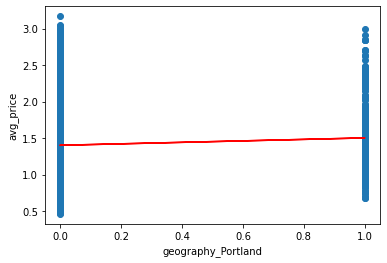

[0.10108035]
1.4021207128950128


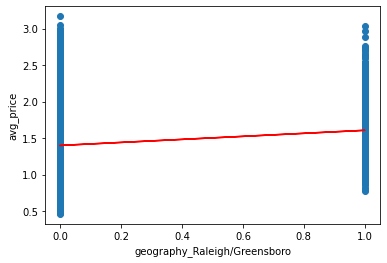

[0.20738792]
1.4001517647646151


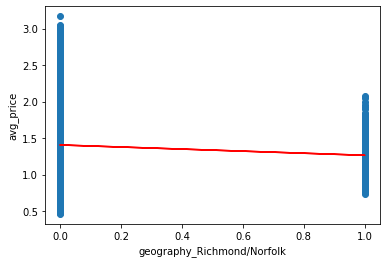

[-0.14150793]
1.4066137486895312


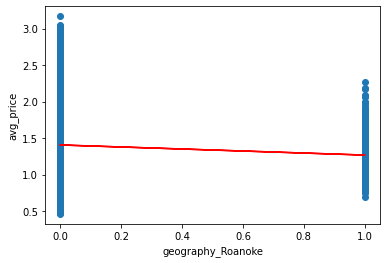

[-0.13843514]
1.4065568369028005


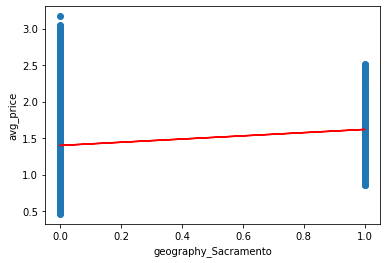

[0.21959819]
1.399925615296291


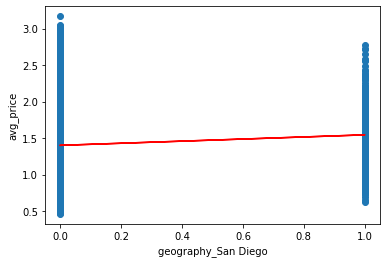

[0.14372197]
1.4013309370475764


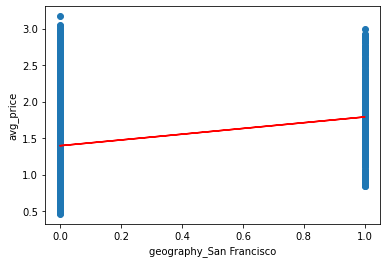

[0.39399221]
1.3966956217862316


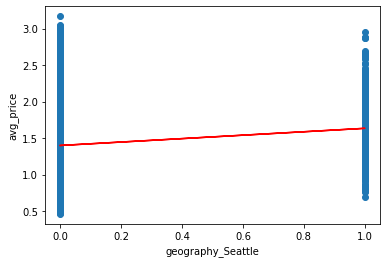

[0.23509689]
1.3996385602316412


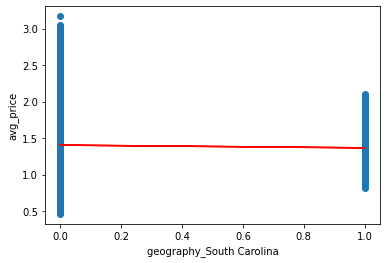

[-0.0374106]
1.4046857371074835


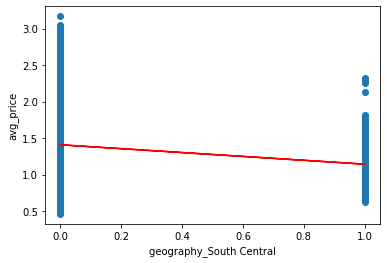

[-0.26563226]
1.4089126853377263


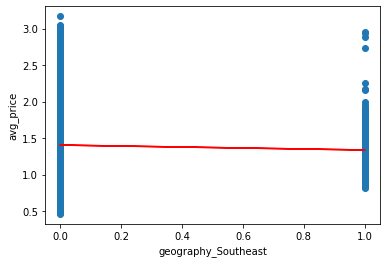

[-0.0674646]
1.4052423743198044


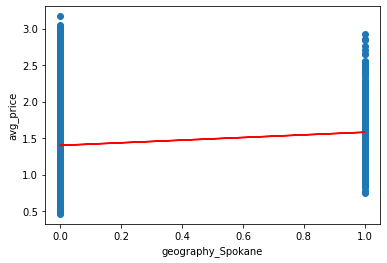

[0.18067625]
1.4006464979282114


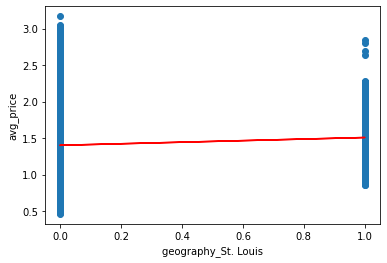

[0.10679465]
1.402014876940742


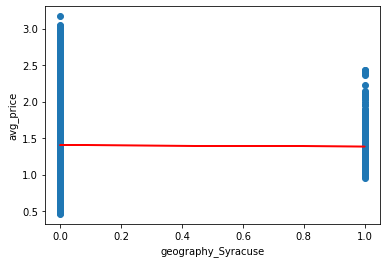

[-0.01937821]
1.4043517547800908


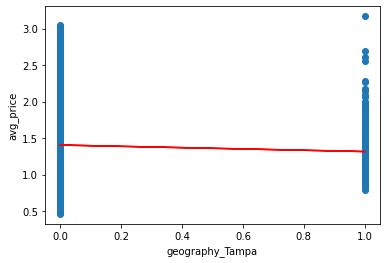

[-0.08940536]
1.4056487444461085


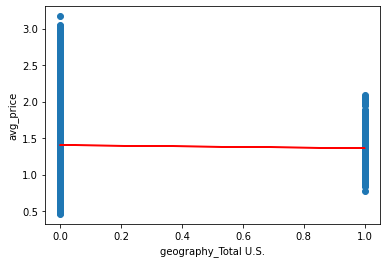

[-0.04274755]
1.4047845838949629


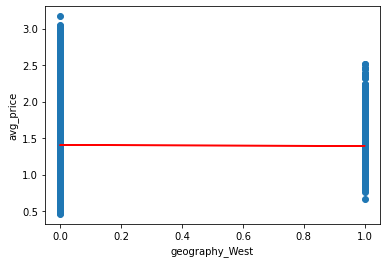

[-0.00991727]
1.4041765263841046


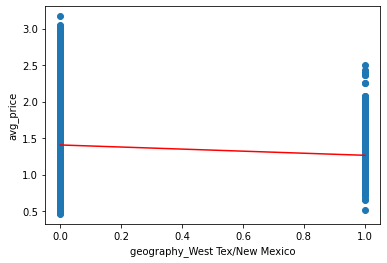

[-0.1416558]
1.406602605700594


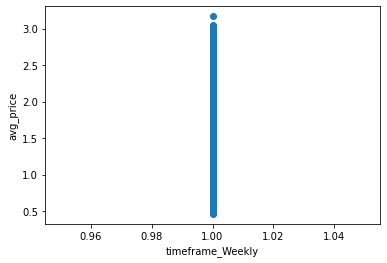

[0.]
1.403992846293302


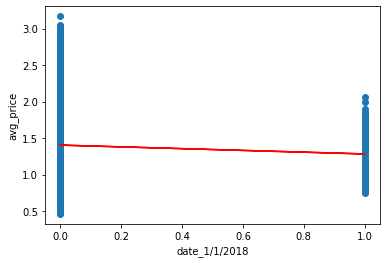

[-0.12111524]
1.404633761883651


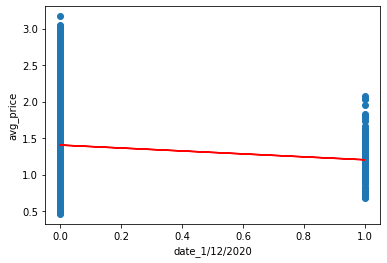

[-0.20135467]
1.4050583715087928


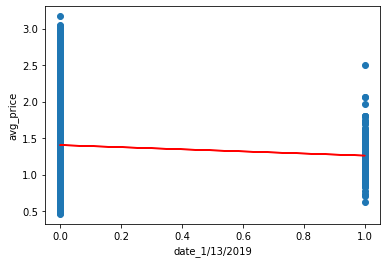

[-0.14392111]
1.404754445593813


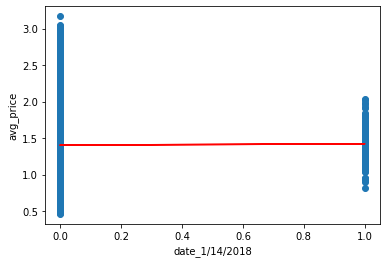

[0.0186987]
1.4038938968523718


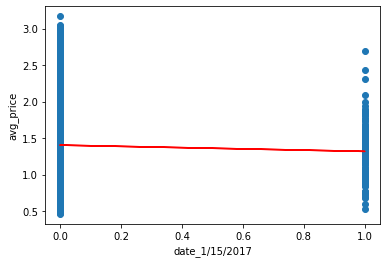

[-0.08583596]
1.404447071572829


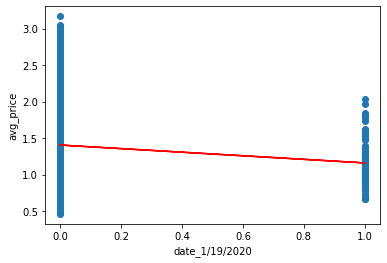

[-0.24463928]
1.4052874242648146


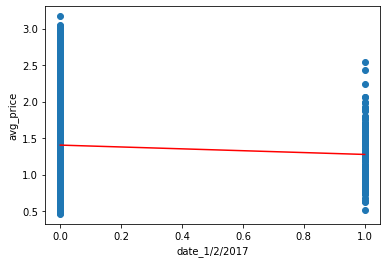

[-0.12800355]
1.4046702132899858


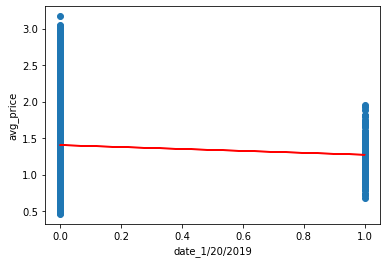

[-0.13209929]
1.4046918870991576


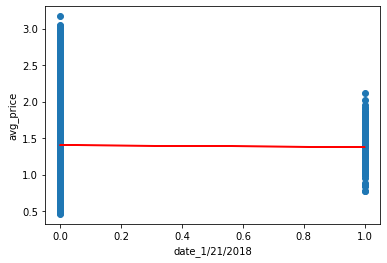

[-0.02700613]
1.404135756859268


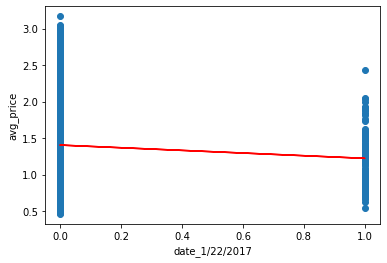

[-0.1817137]
1.4049544357420816


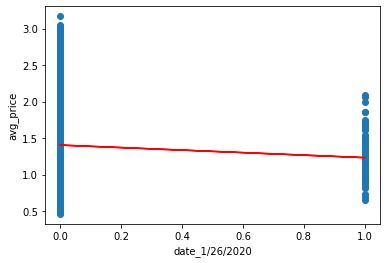

[-0.17221901]
1.4049041919117284


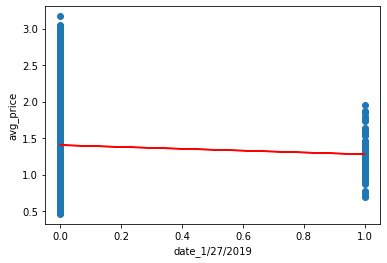

[-0.12614184]
1.404660361558544


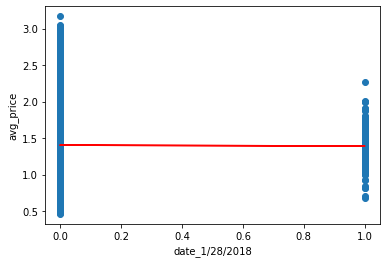

[-0.01183324]
1.4040554652480173


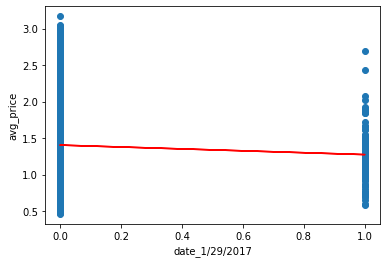

[-0.13014451]
1.4046815427811439


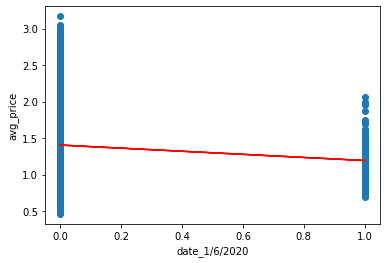

[-0.21196638]
1.405114526378011


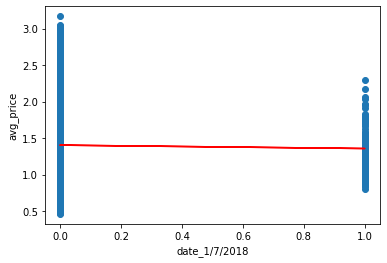

[-0.04646093]
1.4042387074528349


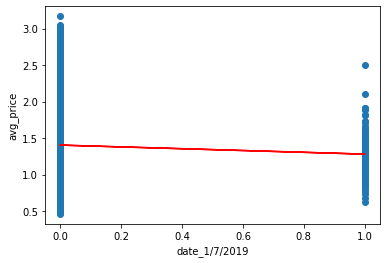

[-0.12353546]
1.4046465691345253


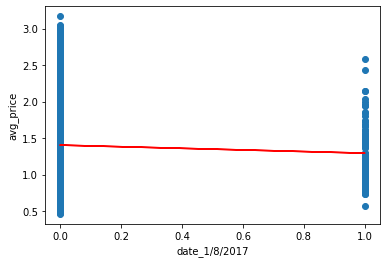

[-0.11013119]
1.4045756366681443


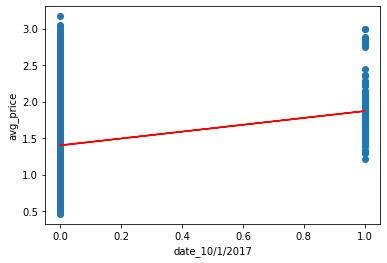

[0.46978947]
1.4015068223240235


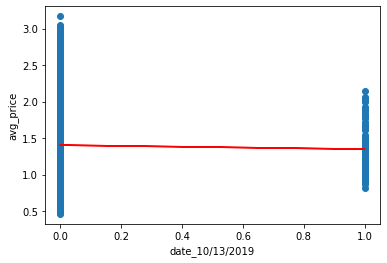

[-0.05521094]
1.4042850105906113


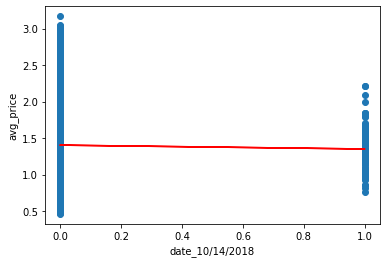

[-0.05269764]
1.4042717107531648


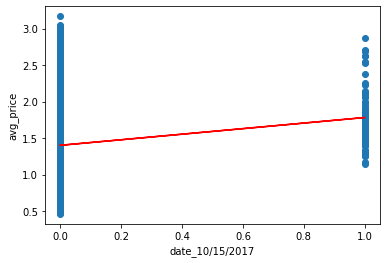

[0.38089313]
1.4019772425003696


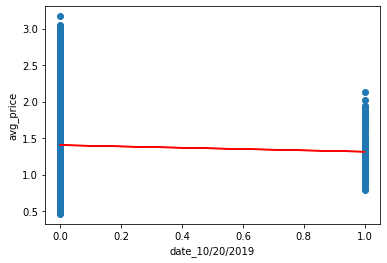

[-0.08993171]
1.4044687453820008


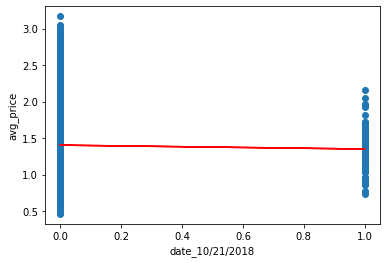

[-0.05344232]
1.4042756514457415


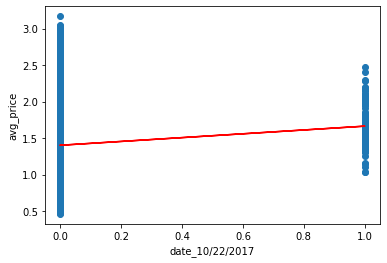

[0.26193027]
1.4026067681395005


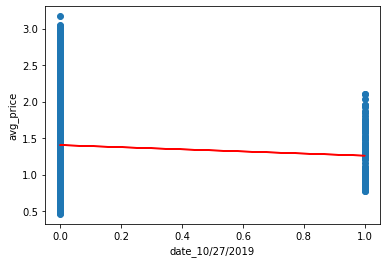

[-0.14475888]
1.404758878872962


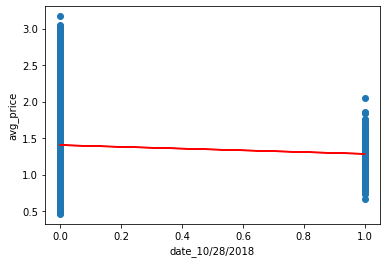

[-0.1195328]
1.4046253879119255


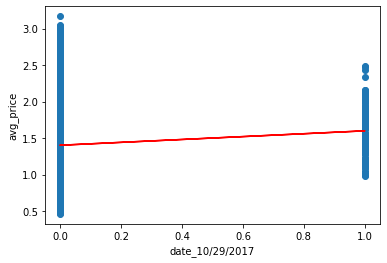

[0.19723607]
1.4029491158071032


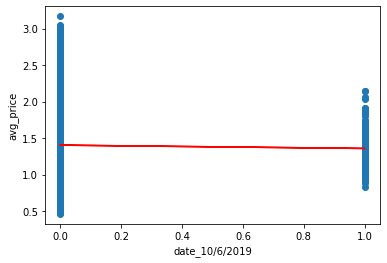

[-0.04553008]
1.404233781587114


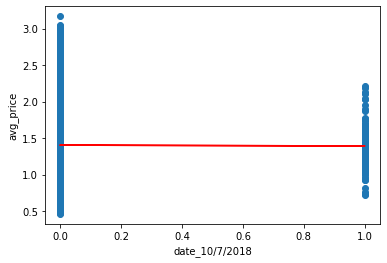

[-0.01080931]
1.4040500467957244


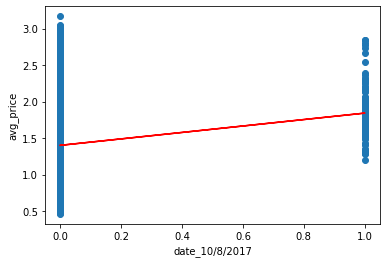

[0.44167775]
1.4016555834687947


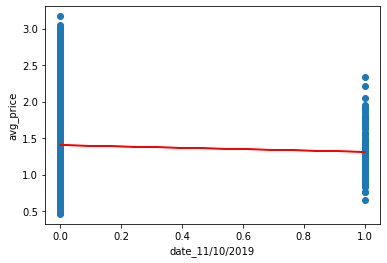

[-0.09197958]
1.404479582286587


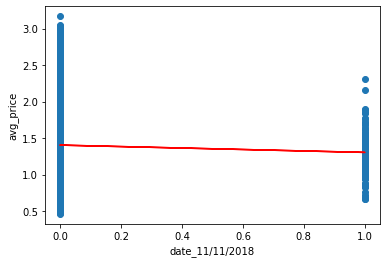

[-0.09998491]
1.4045219447317867


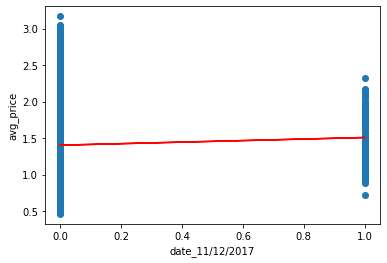

[0.105361]
1.403435298753756


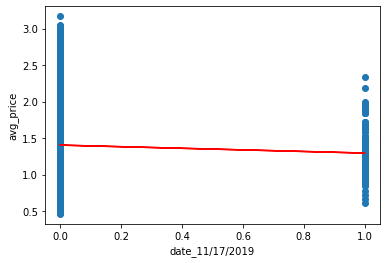

[-0.10901417]
1.4045697256292793


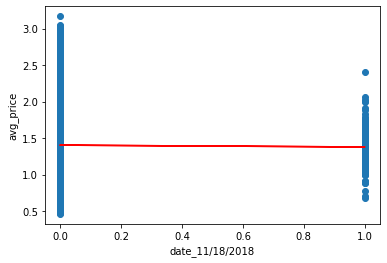

[-0.02486517]
1.40412442736811


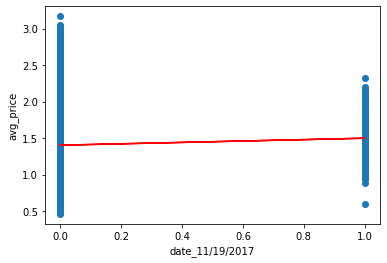

[0.09568014]
1.4034865277572535


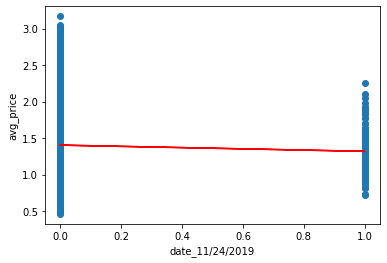

[-0.08518436]
1.4044436234668243


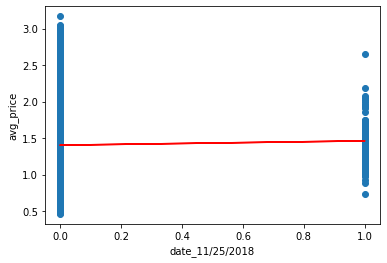

[0.05900458]
1.403680606866657


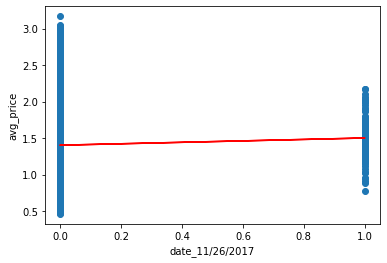

[0.09865886]
1.4034707649869465


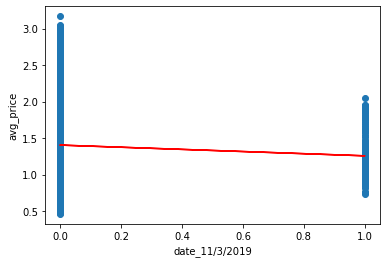

[-0.14689984]
1.40477020836412


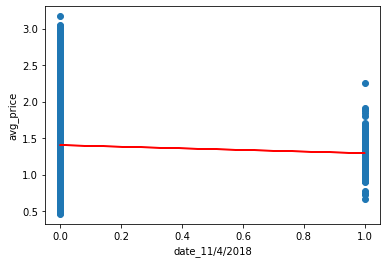

[-0.11050353]
1.404577607014433


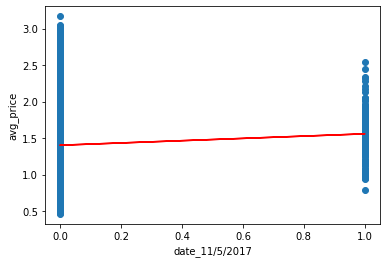

[0.15590625]
1.403167824245111


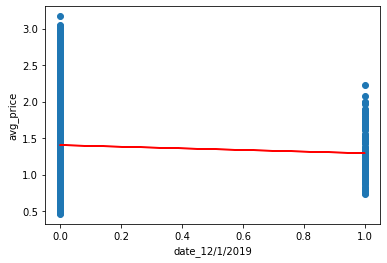

[-0.11096896]
1.4045800699472932


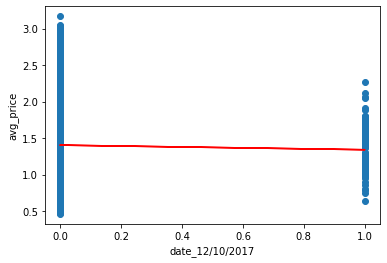

[-0.06284392]
1.4043254026895227


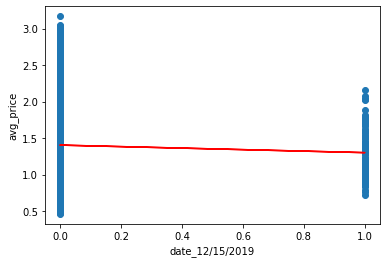

[-0.1031498]
1.4045386926752377


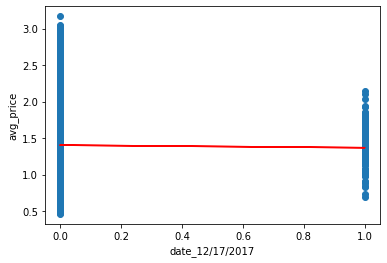

[-0.03519762]
1.404179104477612


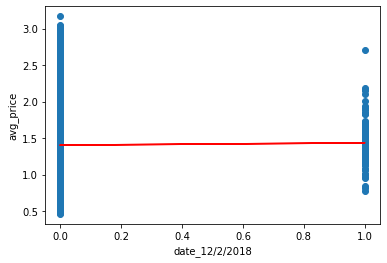

[0.03173062]
1.4038249347322793


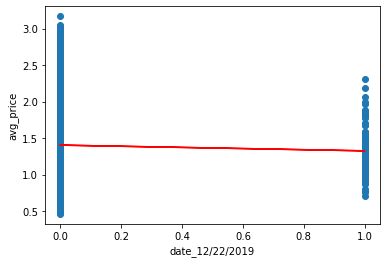

[-0.07829606]
1.4044071720604896


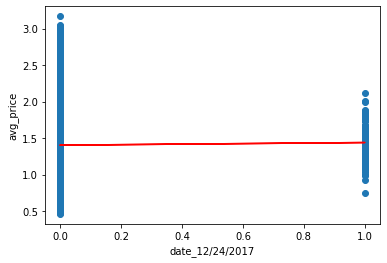

[0.03610562]
1.403801783163391


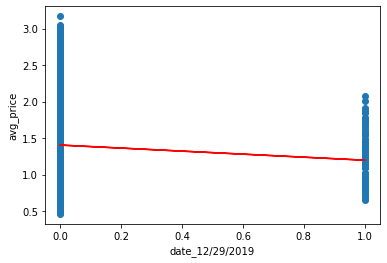

[-0.2074052]
1.4050903896359785


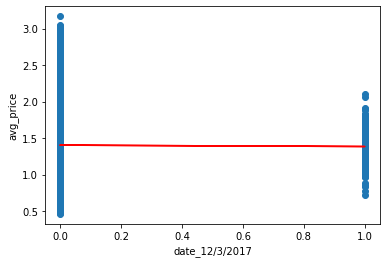

[-0.01872155]
1.404091916654352


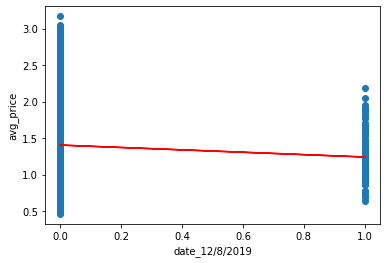

[-0.16337591]
1.40485739618738


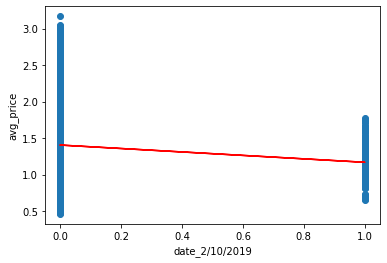

[-0.23616852]
1.4052425988867543


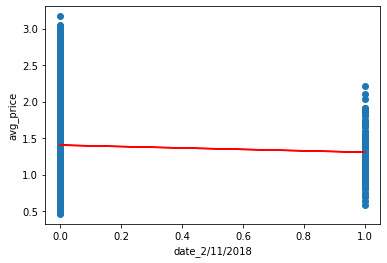

[-0.09747161]
1.4045086448943402


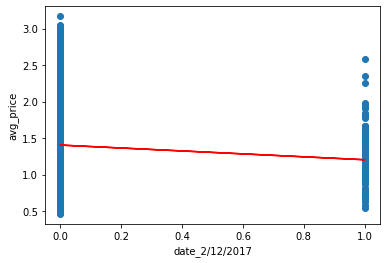

[-0.20107541]
1.4050568937490764


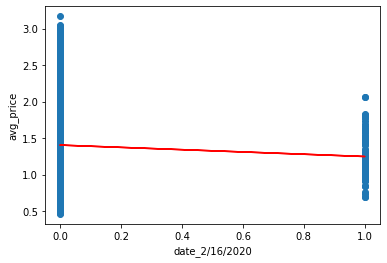

[-0.15648761]
1.4048209447810454


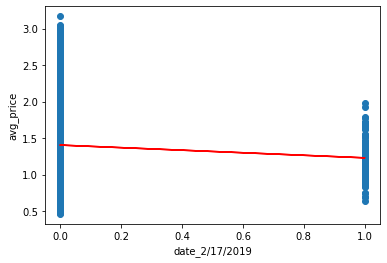

[-0.17473231]
1.404917491749175


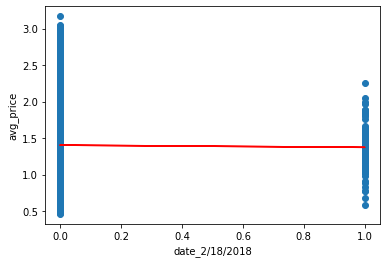

[-0.03007794]
1.404152012216147


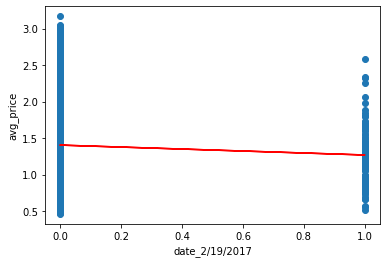

[-0.13535728]
1.4047091276291808


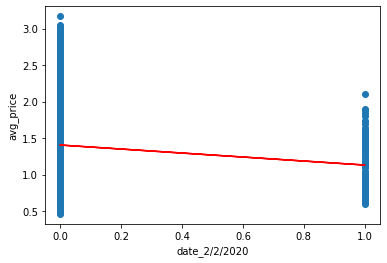

[-0.27405419]
1.405443081621595


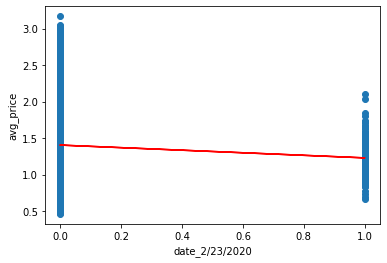

[-0.17529082]
1.4049204472686074


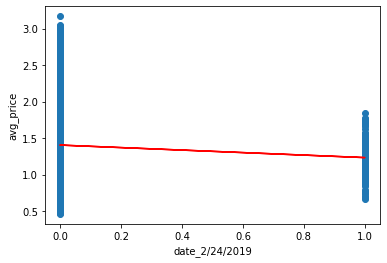

[-0.17147433]
1.4049002512191517


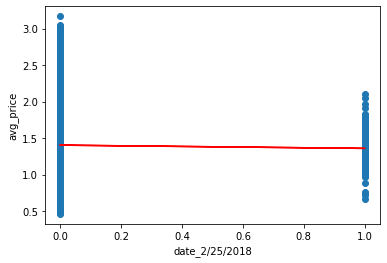

[-0.04459923]
1.404228855721393


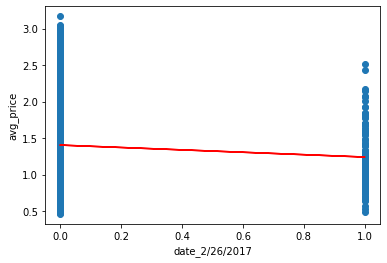

[-0.16374826]
1.4048593665336684


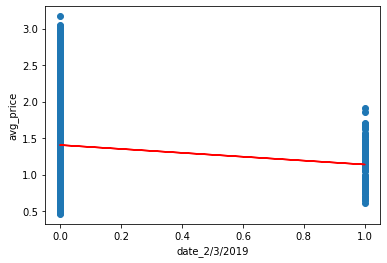

[-0.26660738]
1.4054036746958278


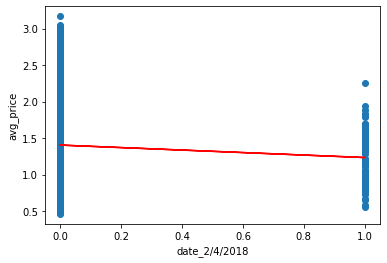

[-0.17082273]
1.4048968031131472


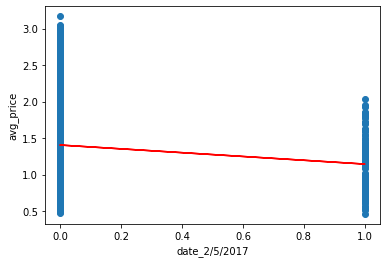

[-0.26064993]
1.405372149155214


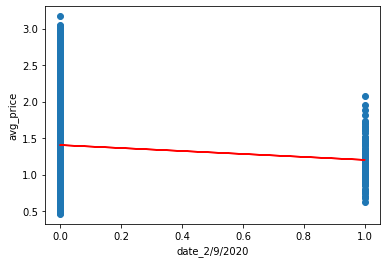

[-0.20284403]
1.4050662528939462


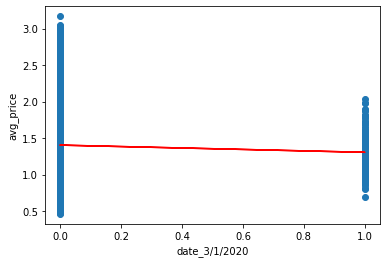

[-0.09858863]
1.4045145559332053


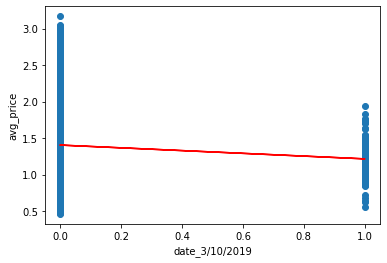

[-0.18888125]
1.4049923649081326


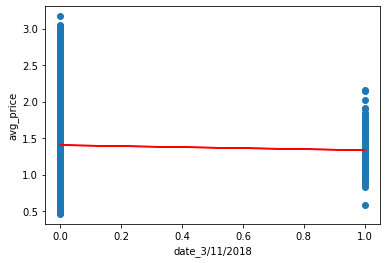

[-0.0692668]
1.404359391162997


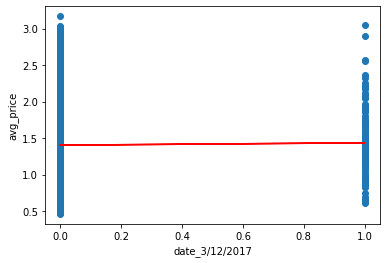

[0.03228913]
1.4038219792128468


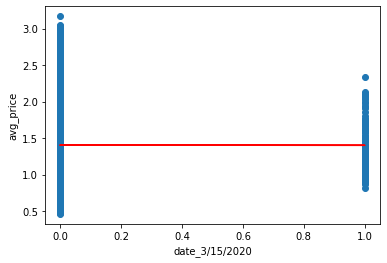

[-0.0020593]
1.404003743657948


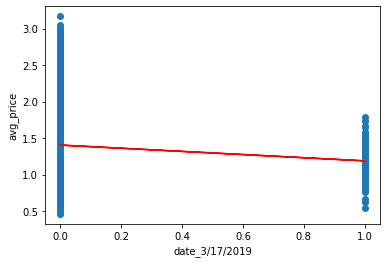

[-0.21662064]
1.4051391557066155


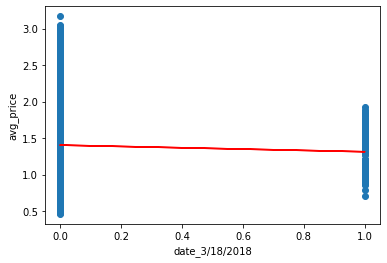

[-0.09076947]
1.4044731786611497


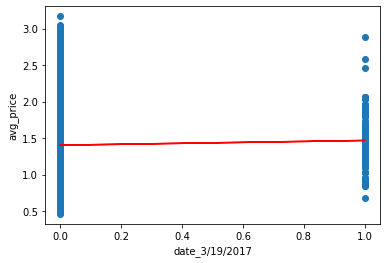

[0.0644966]
1.4036515442589035


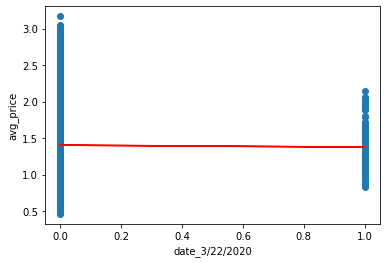

[-0.02700613]
1.404135756859268


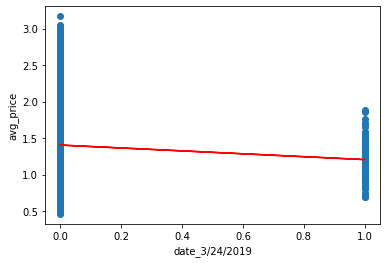

[-0.19902754]
1.4050460568444905


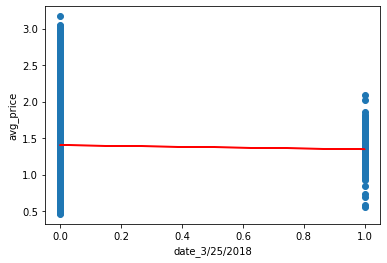

[-0.05744498]
1.4042968326683416


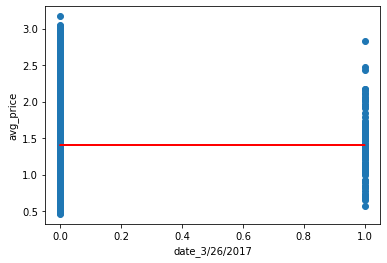

[8.16599073e-05]
1.4039924141667899


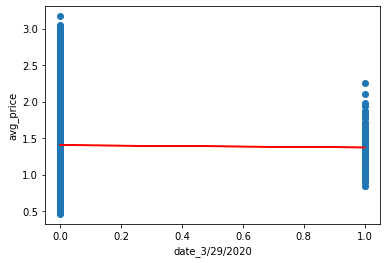

[-0.03212581]
1.404162849120733


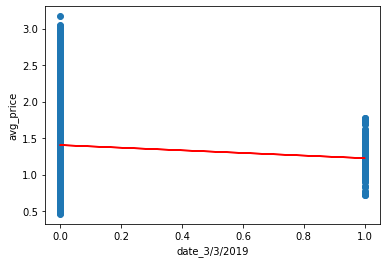

[-0.17947965]
1.4049426136643515


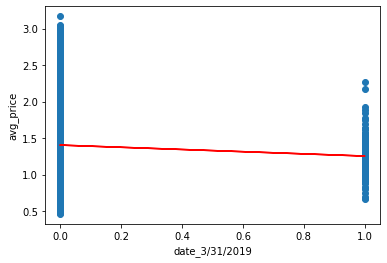

[-0.15015782]
1.4047874488941432


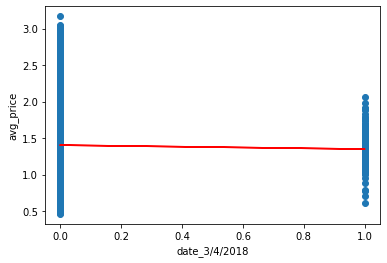

[-0.05409391]
1.4042790995517462


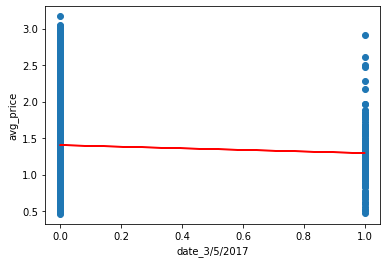

[-0.10923846]
1.4045655600433458


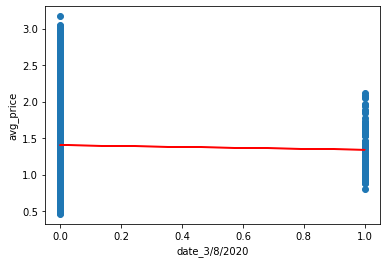

[-0.06284392]
1.4043254026895227


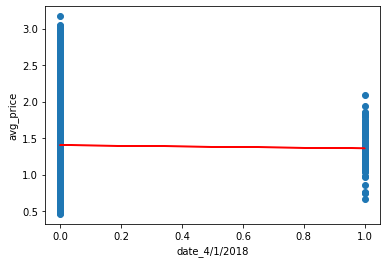

[-0.04459923]
1.404228855721393


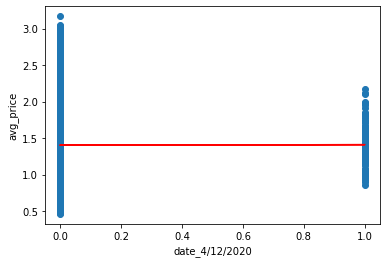

[0.00669071]
1.4039574405201714


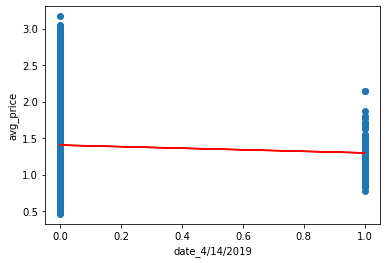

[-0.1063147]
1.4045554406186886


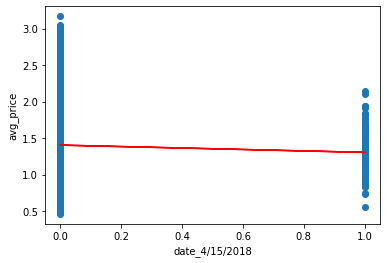

[-0.09951948]
1.4045194817989262


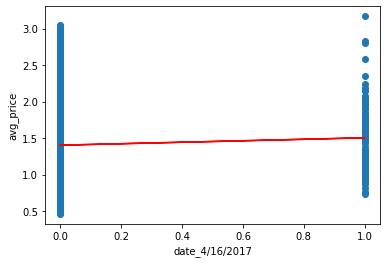

[0.10135833]
1.4034564799763558


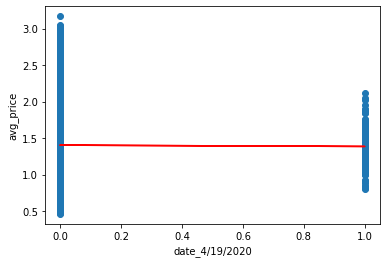

[-0.01788378]
1.4040874833752033


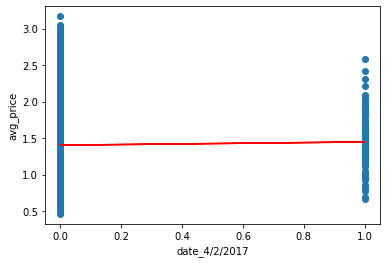

[0.04429712]
1.403758435545047


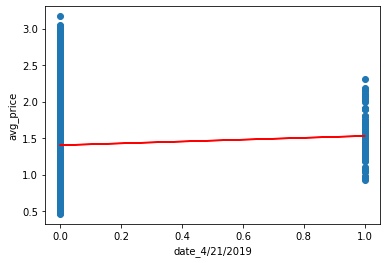

[0.12677059]
1.4033220038421754


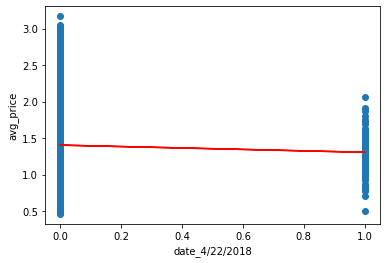

[-0.09830937]
1.404513078173489


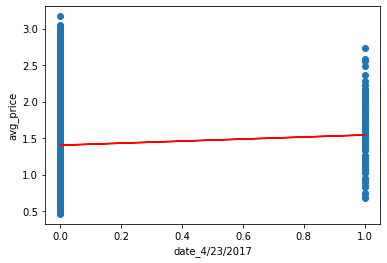

[0.14045411]
1.403249593616078


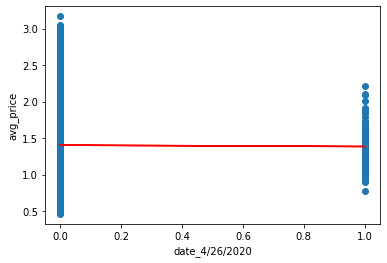

[-0.01853538]
1.4040909314812078


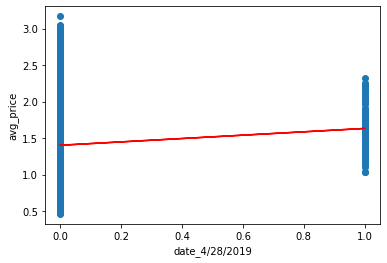

[0.23028131]
1.4027742475740113


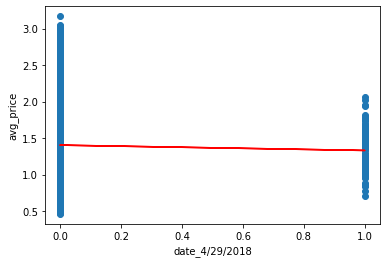

[-0.07308329]
1.4043795872124527


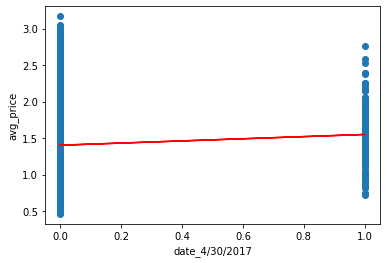

[0.14734241]
1.4032131422097434


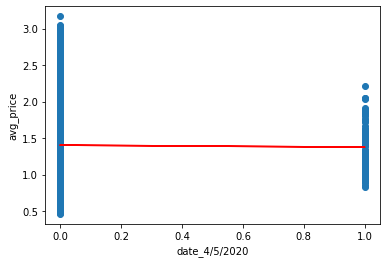

[-0.02756464]
1.4041387123787006


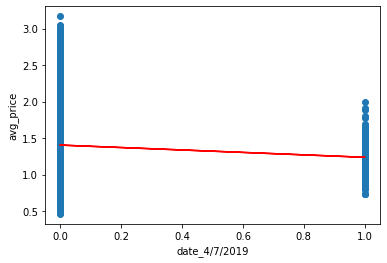

[-0.16728549]
1.4048780848234077


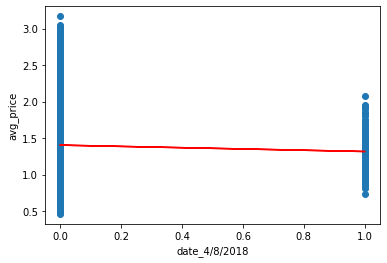

[-0.08760458]
1.4044564307176988


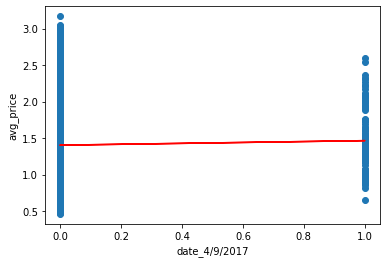

[0.06226256]
1.4036633663366338


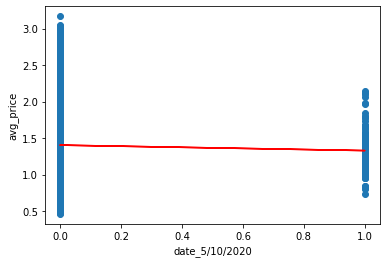

[-0.07485191]
1.4043889463573223


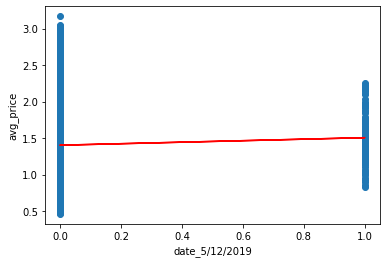

[0.10312695]
1.4034471208314863


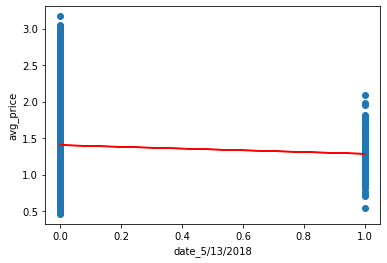

[-0.11869503]
1.4046209546327768


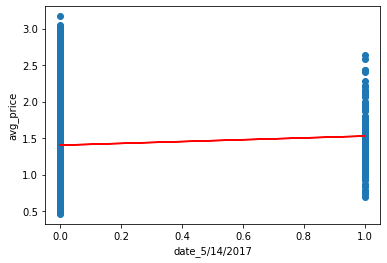

[0.12500197]
1.403331362987045


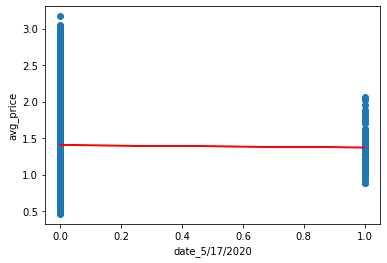

[-0.03305666]
1.4041677749864538


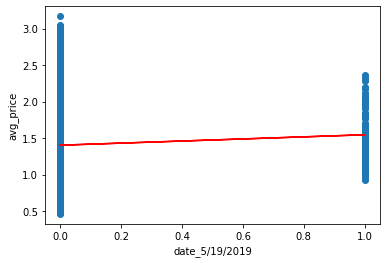

[0.14315358]
1.4032353086054874


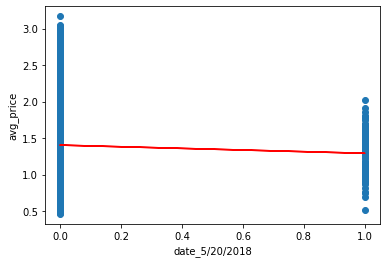

[-0.11217907]
1.4045864735727305


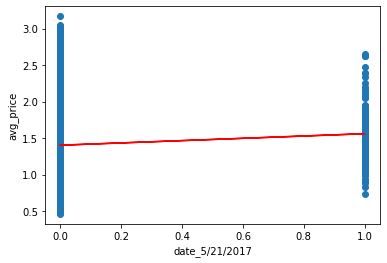

[0.15767487]
1.4031584651002413


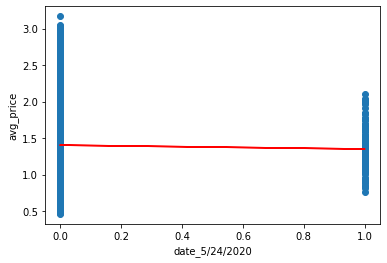

[-0.05325615]
1.4042746662725973


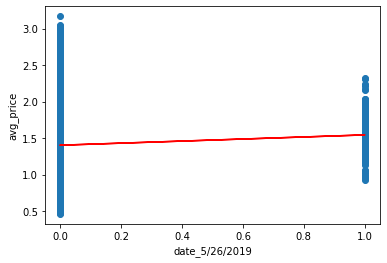

[0.14110571]
1.4032461455100735


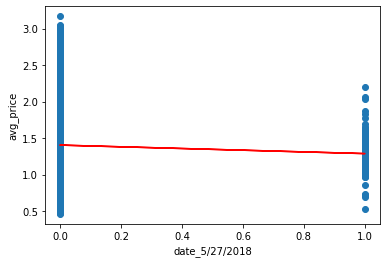

[-0.1163679]
1.4046086399684745


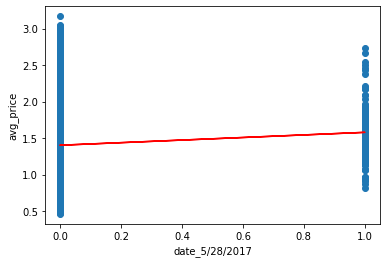

[0.17647807]
1.4030589626126793


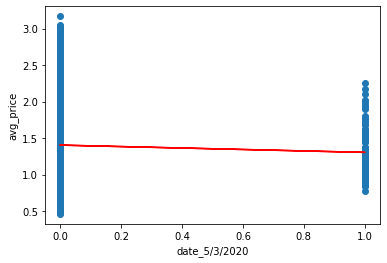

[-0.09970565]
1.4045204669720703


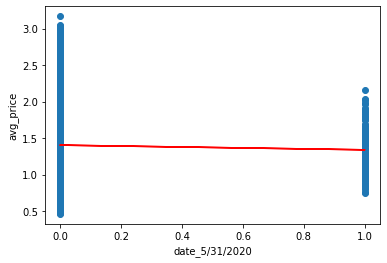

[-0.06405403]
1.40433180631496


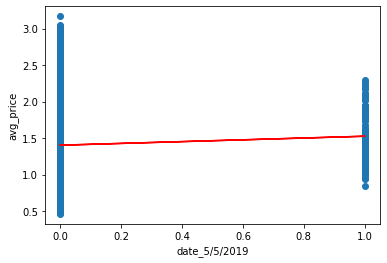

[0.12304718]
1.403341707305059


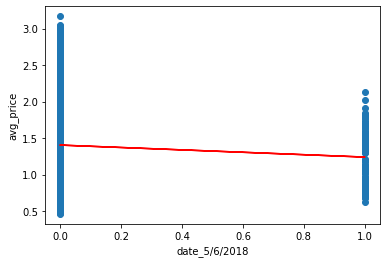

[-0.16421368]
1.4048618294665287


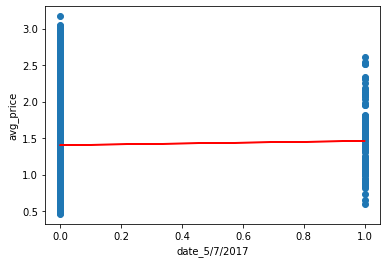

[0.05798064]
1.4036860253189498


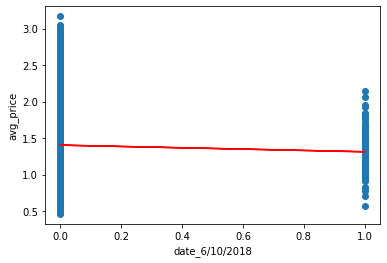

[-0.0912349]
1.4044756415940103


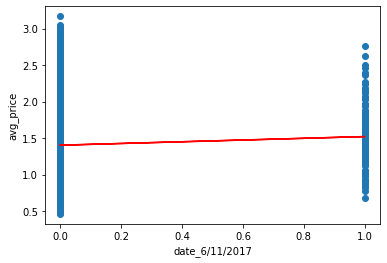

[0.11820675]
1.4033673218068077


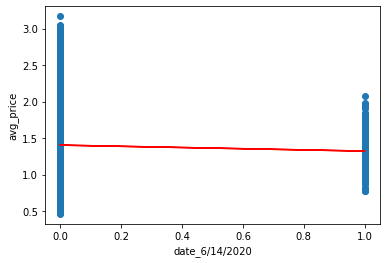

[-0.0818333]
1.4044258903502291


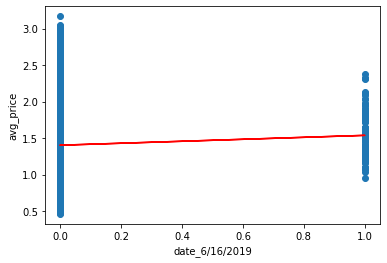

[0.13505517]
1.4032781636372593


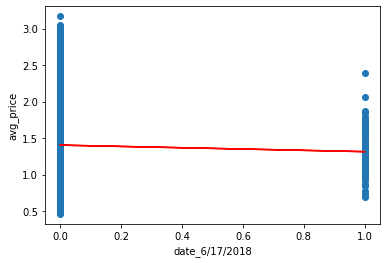

[-0.08955937]
1.4044667750357125


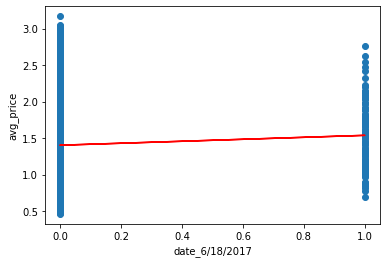

[0.13522076]
1.4032839129149837


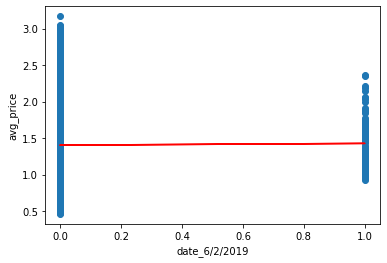

[0.02419072]
1.4038648342446185


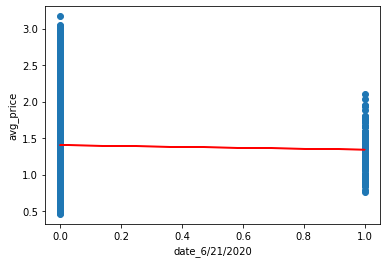

[-0.0617269]
1.4043194916506576


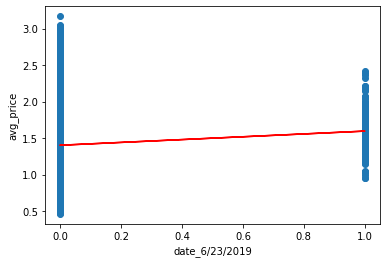

[0.19351266]
1.4029688192699867


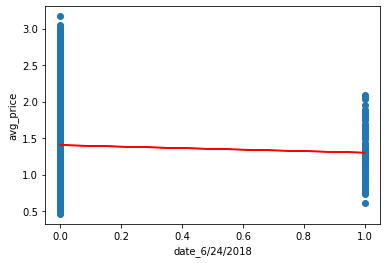

[-0.10333597]
1.4045396778483819


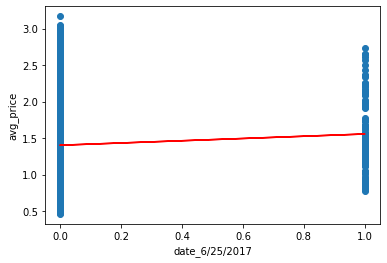

[0.15372901]
1.4031868781400845


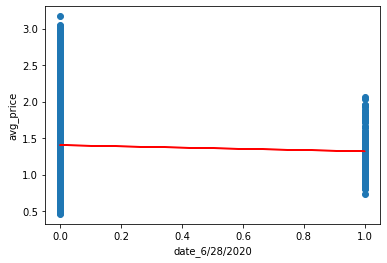

[-0.08509128]
1.4044431308802523


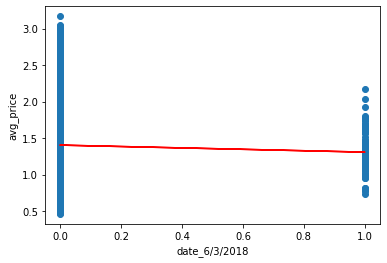

[-0.09598224]
1.4045007635091868


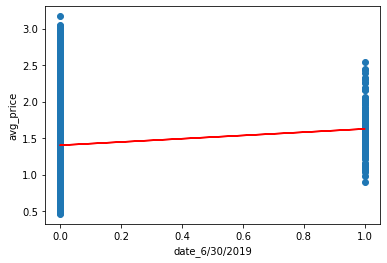

[0.22376535]
1.4028087286340576


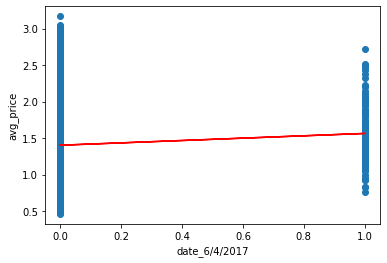

[0.16149136]
1.4031382690507856


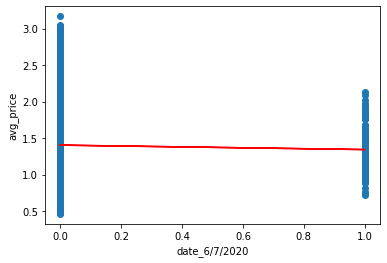

[-0.06088913]
1.4043150583715087


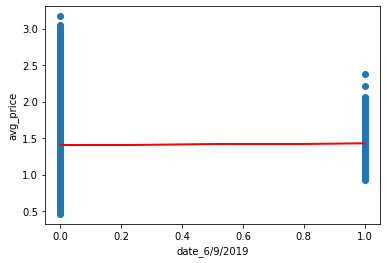

[0.02428381]
1.4038643416580465


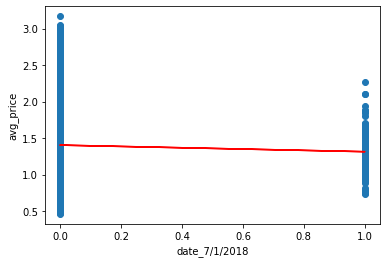

[-0.09002479]
1.404469237968573


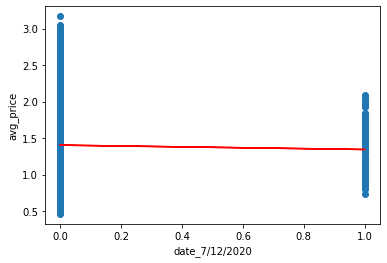

[-0.05977211]
1.4043091473326437


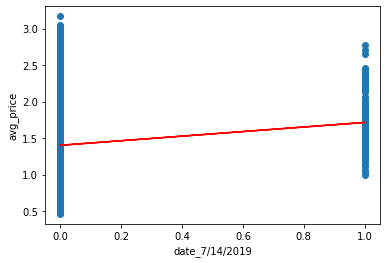

[0.3132202]
1.402335352938279


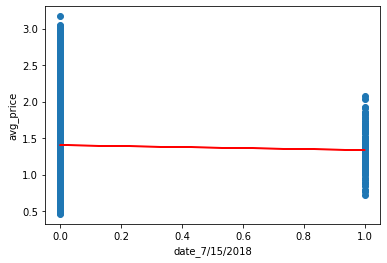

[-0.06777744]
1.4043515097778434


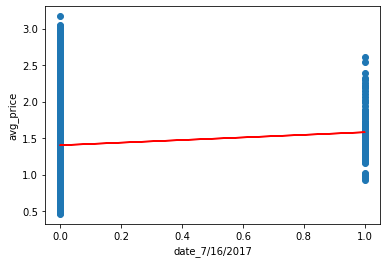

[0.17796744]
1.4030510812275259


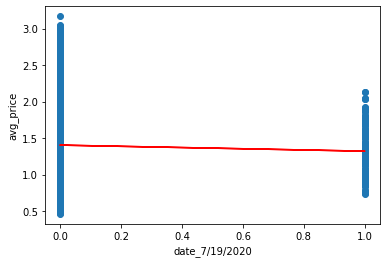

[-0.08276415]
1.40443081621595


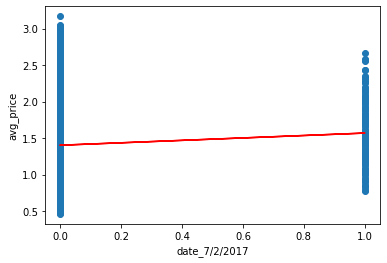

[0.16642488]
1.403112161962465


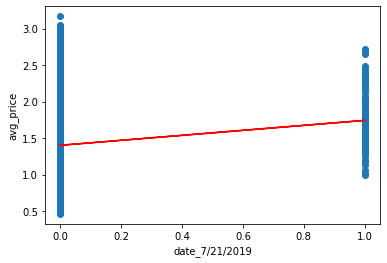

[0.34142501]
1.4021860992069357


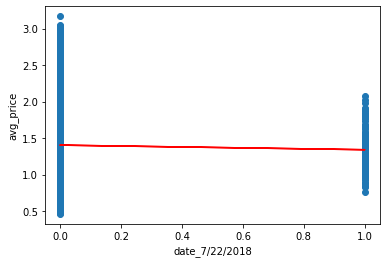

[-0.06284392]
1.4043254026895227


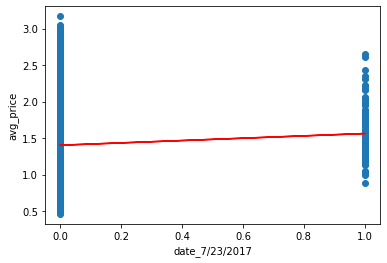

[0.16028125]
1.403144672676223


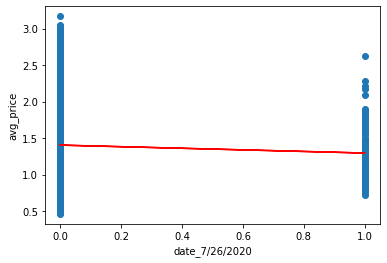

[-0.10864183]
1.404567755282991


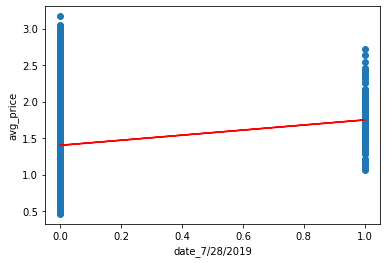

[0.3477548]
1.4021526033200336


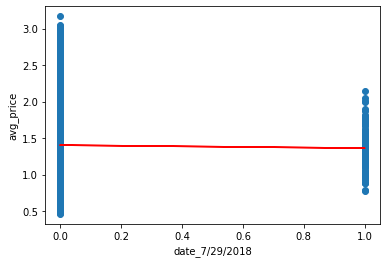

[-0.04124816]
1.4042111226047977


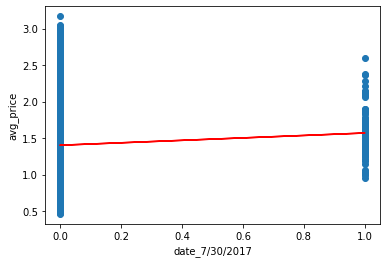

[0.16726264]
1.4031077286833162


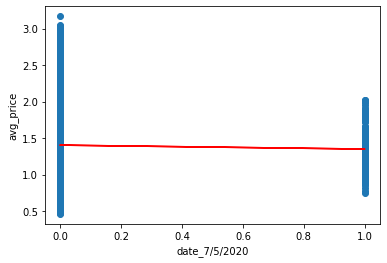

[-0.05372157]
1.4042771292054579


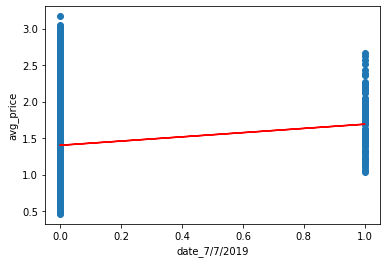

[0.28883189]
1.4024644106201665


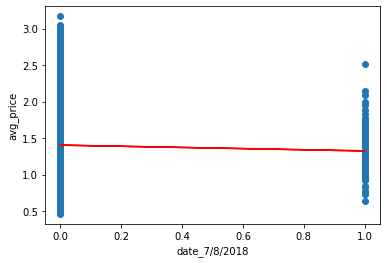

[-0.07932]
1.4044125905127827


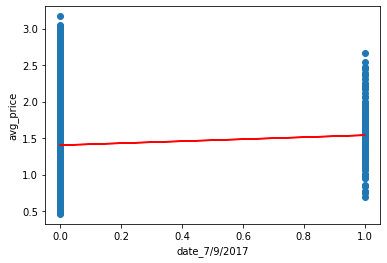

[0.13700996]
1.4032678193192454


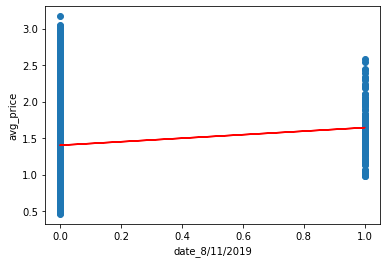

[0.24135844]
1.4027156297719325


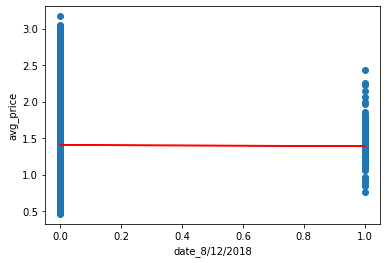

[-0.01118165]
1.4040520171420128


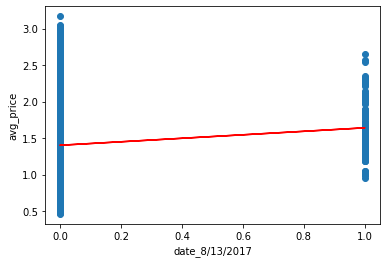

[0.23884514]
1.402728929609379


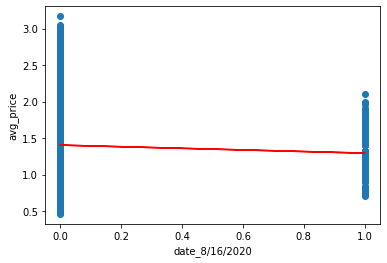

[-0.10994502]
1.4045746514950004


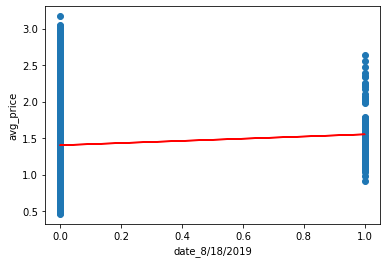

[0.14911103]
1.4032037830648738


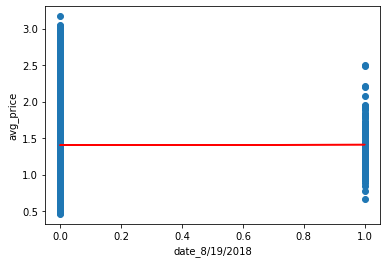

[0.00771464]
1.4039520220678785


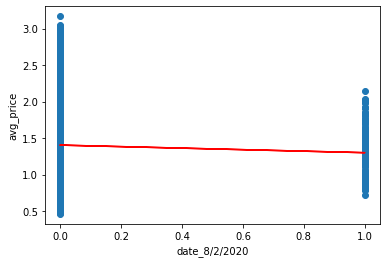

[-0.1038014]
1.4045421407812424


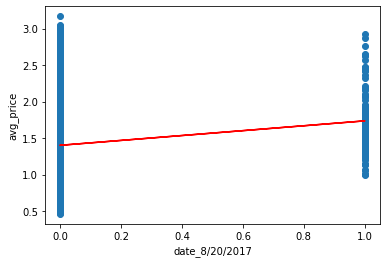

[0.33462979]
1.4022220580266982


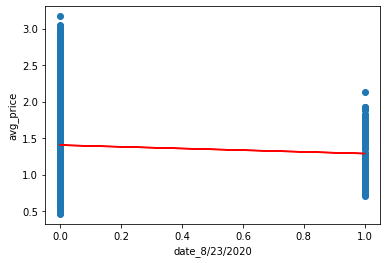

[-0.11580939]
1.404605684449042


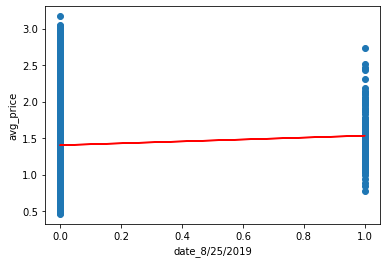

[0.13040091]
1.403302792965864


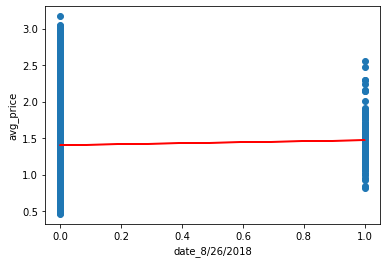

[0.06784767]
1.4036338111423083


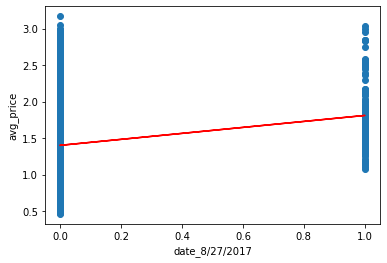

[0.40937719]
1.40182651100931


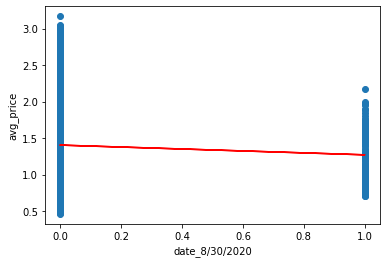

[-0.13321632]
1.4046977981380229


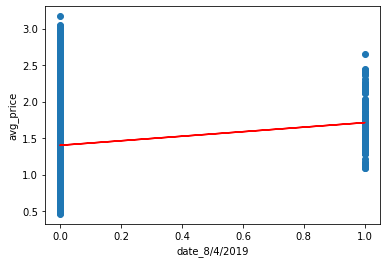

[0.31033456]
1.4023506231220138


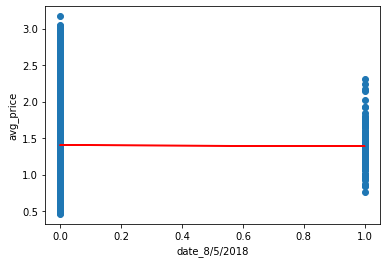

[-0.01481197]
1.4040712280183243


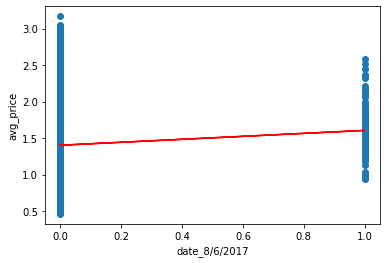

[0.20328661]
1.4029170976799172


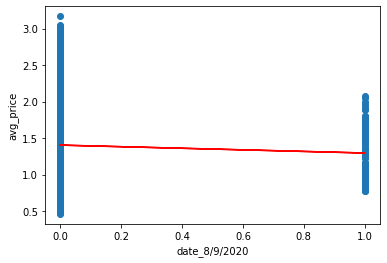

[-0.1081764]
1.4045652923501306


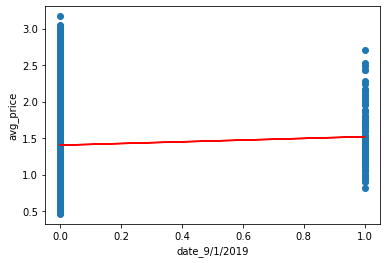

[0.11681047]
1.4033747106053889


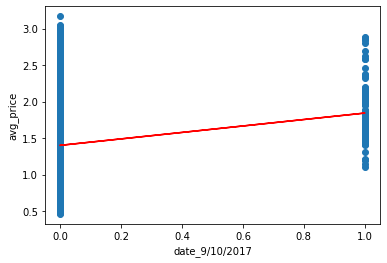

[0.44223626]
1.4016526279493622


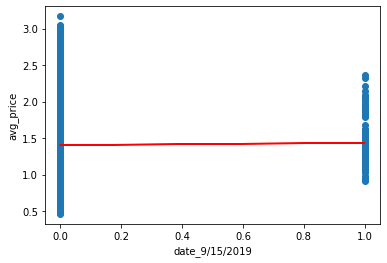

[0.03266147]
1.4038200088665584


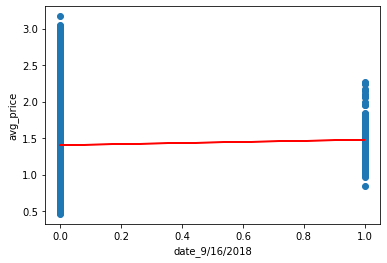

[0.07492214]
1.4035963745628295


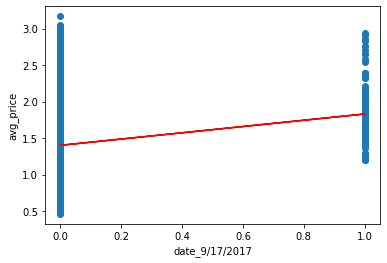

[0.42966976]
1.4017191271365943


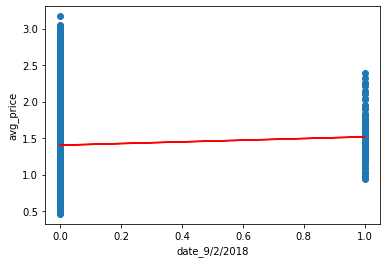

[0.11448335]
1.4033870252696912


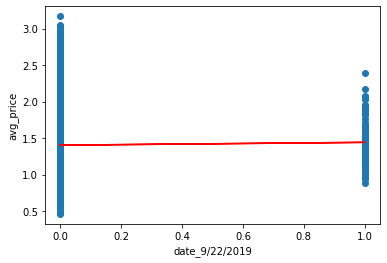

[0.03861892]
1.4037884833259446


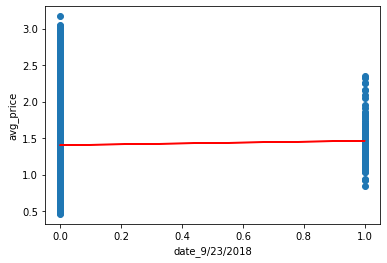

[0.0601216]
1.4036746958277917


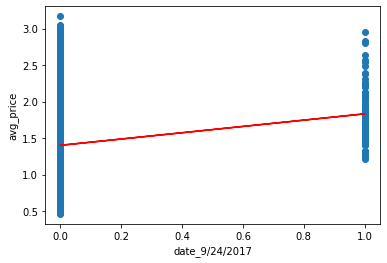

[0.43162455]
1.4017087828185804


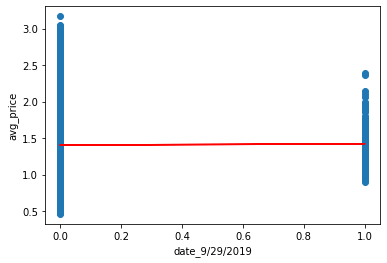

[0.01925721]
1.4038909413329392


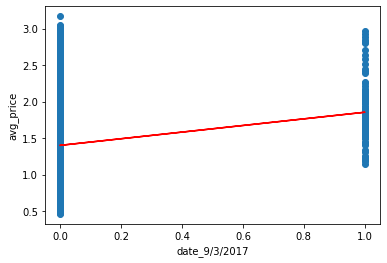

[0.45359265]
1.4015925323875673


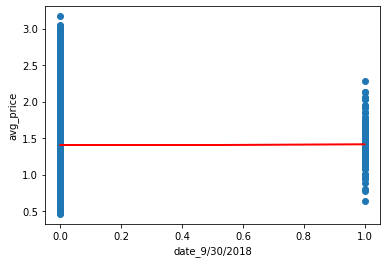

[0.0105072]
1.4039372444707157


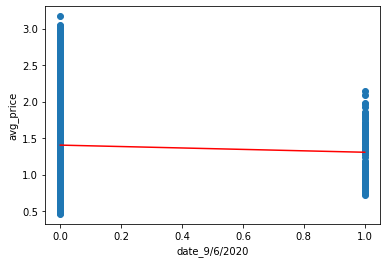

[-0.09784395]
1.4045106152406286


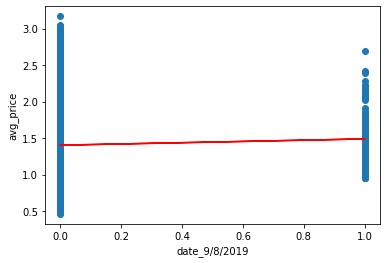

[0.08599928]
1.4035377567607508


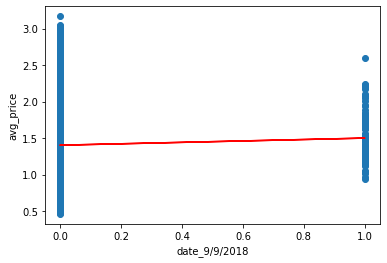

[0.0971695]
1.4034786463720998


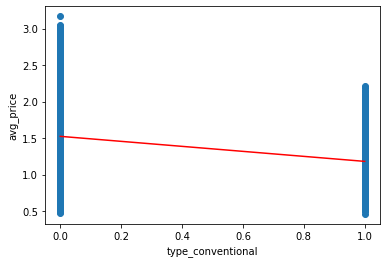

[-0.34315448]
1.5247501323051385


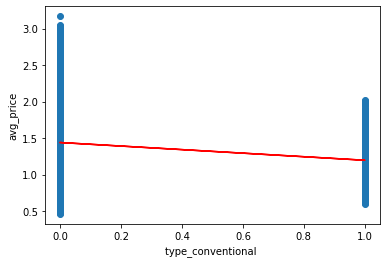

[-0.24297763]
1.439994823123379


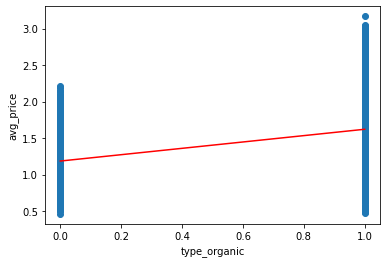

[0.43571974]
1.1861650009798275


In [57]:
prices_ml_df['price_cat'] = pd.to_numeric(prices_ml_df['price_cat'])

for col in prices_ml_df.columns:
    if type(prices_ml_df[col]) == int or float:
        modelLinearReg(prices_ml_df[col], prices_ml_df['avg_price'])
        
        

In [58]:
prices_orig_df.columns



Index(['4046_units', '4225_units', '4770_units', 's_bags', 'l_bags', 'xl_bags',
       'price_cat', 'year_month_1/1/2017', 'year_month_1/1/2018',
       'year_month_1/1/2019',
       ...
       'date_9/24/2017', 'date_9/29/2019', 'date_9/3/2017', 'date_9/30/2018',
       'date_9/6/2020', 'date_9/8/2019', 'date_9/9/2018', 'type_conventional',
       'type_conventional ', 'type_organic'],
      dtype='object', length=299)

In [59]:
prices_rat_df.columns


Index(['price_cat', '4046_ratio_units', '4225_ratio_units', '4770_ratio_units',
       's_ratio_bags', 'l_ratio_bags', 'xl_ratio_bags', 'year_month_1/1/2017',
       'year_month_1/1/2018', 'year_month_1/1/2019',
       ...
       'date_9/24/2017', 'date_9/29/2019', 'date_9/3/2017', 'date_9/30/2018',
       'date_9/6/2020', 'date_9/8/2019', 'date_9/9/2018', 'type_conventional',
       'type_conventional ', 'type_organic'],
      dtype='object', length=299)

In [60]:
prices_per_df.columns



Index(['price_cat', '4046_per_units', '4225_per_units', '4770_per_units',
       's_per_bags', 'l_per_bags', 'xl_per_bags', 'year_month_1/1/2017',
       'year_month_1/1/2018', 'year_month_1/1/2019',
       ...
       'date_9/24/2017', 'date_9/29/2019', 'date_9/3/2017', 'date_9/30/2018',
       'date_9/6/2020', 'date_9/8/2019', 'date_9/9/2018', 'type_conventional',
       'type_conventional ', 'type_organic'],
      dtype='object', length=299)

In [61]:
prices_per_rat_df.columns



Index(['price_cat', '4046_ratio_units', '4225_ratio_units', '4770_ratio_units',
       's_ratio_bags', 'l_ratio_bags', 'xl_ratio_bags', '4046_per_units',
       '4225_per_units', '4770_per_units',
       ...
       'date_9/24/2017', 'date_9/29/2019', 'date_9/3/2017', 'date_9/30/2018',
       'date_9/6/2020', 'date_9/8/2019', 'date_9/9/2018', 'type_conventional',
       'type_conventional ', 'type_organic'],
      dtype='object', length=305)

In [62]:
prices_ap_orig_df.columns



Index(['avg_price', '4046_units', '4225_units', '4770_units', 's_bags',
       'l_bags', 'xl_bags', 'year_month_1/1/2017', 'year_month_1/1/2018',
       'year_month_1/1/2019',
       ...
       'date_9/24/2017', 'date_9/29/2019', 'date_9/3/2017', 'date_9/30/2018',
       'date_9/6/2020', 'date_9/8/2019', 'date_9/9/2018', 'type_conventional',
       'type_conventional ', 'type_organic'],
      dtype='object', length=299)

In [63]:
prices_ap_rat_df.columns


Index(['avg_price', '4046_ratio_units', '4225_ratio_units', '4770_ratio_units',
       's_ratio_bags', 'l_ratio_bags', 'xl_ratio_bags', 'year_month_1/1/2017',
       'year_month_1/1/2018', 'year_month_1/1/2019',
       ...
       'date_9/24/2017', 'date_9/29/2019', 'date_9/3/2017', 'date_9/30/2018',
       'date_9/6/2020', 'date_9/8/2019', 'date_9/9/2018', 'type_conventional',
       'type_conventional ', 'type_organic'],
      dtype='object', length=299)

In [64]:
prices_ap_per_df.columns



Index(['avg_price', '4046_per_units', '4225_per_units', '4770_per_units',
       's_per_bags', 'l_per_bags', 'xl_per_bags', 'year_month_1/1/2017',
       'year_month_1/1/2018', 'year_month_1/1/2019',
       ...
       'date_9/24/2017', 'date_9/29/2019', 'date_9/3/2017', 'date_9/30/2018',
       'date_9/6/2020', 'date_9/8/2019', 'date_9/9/2018', 'type_conventional',
       'type_conventional ', 'type_organic'],
      dtype='object', length=299)

In [65]:
prices_ap_per_rat_df.columns

Index(['avg_price', '4046_ratio_units', '4225_ratio_units', '4770_ratio_units',
       's_ratio_bags', 'l_ratio_bags', 'xl_ratio_bags', '4046_per_units',
       '4225_per_units', '4770_per_units',
       ...
       'date_9/24/2017', 'date_9/29/2019', 'date_9/3/2017', 'date_9/30/2018',
       'date_9/6/2020', 'date_9/8/2019', 'date_9/9/2018', 'type_conventional',
       'type_conventional ', 'type_organic'],
      dtype='object', length=305)

In [59]:
# originals
y = prices_ap_orig_df['avg_price']
X = prices_ap_orig_df.drop(columns=['avg_price'], axis=1)

modelLinearReg(X, y)

ValueError: Found input variables with inconsistent numbers of samples: [6081882, 20409]

# Logistic Regression Model

In [60]:
def modelLogisticReg(X, y):
    # train and test split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
    
    # import linear regression
    from sklearn.linear_model import LogisticRegression
    
    # create model
    classifier = LogisticRegression(solver='lbfgs', max_iter=200, random_state=1)
    
    # fit model
    classifier.fit(X_train, y_train)
    
    # predict
    y_pred = classifier.predict(X_test)
    
    # accuracy
    from sklearn.metrics import accuracy_score
    print(accuracy_score(y_test, y_pred))
    
    # confusion matrix
    from sklearn.metrics import confusion_matrix, classification_report
    matrix = confusion_matrix(y_test, y_pred)
    print(matrix)
    
    # classification report
    report = classification_report(y_test, y_pred)
    print(report)
    

In [61]:
# original
y = prices_orig_df['price_cat']
X = prices_orig_df.drop(columns=['price_cat'], axis=1)

modelLogisticReg(X, y)

0.36703899666862627
[[993 227  50  62]
 [550 298 179 208]
 [445 249 314 279]
 [369 291 321 268]]
              precision    recall  f1-score   support

           0       0.42      0.75      0.54      1332
           1       0.28      0.24      0.26      1235
           2       0.36      0.24      0.29      1287
           3       0.33      0.21      0.26      1249

    accuracy                           0.37      5103
   macro avg       0.35      0.36      0.34      5103
weighted avg       0.35      0.37      0.34      5103



In [62]:
# original
#y = prices_ap_orig_df['avg_price']
#X = prices_ap_orig_df.drop(columns=['avg_price'], axis=1)

#modelLogisticReg(X, y)


In [63]:
# ratios
y = prices_rat_df['price_cat']
X = prices_rat_df.drop(columns=['price_cat'], axis=1)

modelLogisticReg(X, y)

0.6435430139133843
[[1081  156   79   16]
 [ 289  587  286   73]
 [  53  275  678  281]
 [  12   51  248  938]]
              precision    recall  f1-score   support

           0       0.75      0.81      0.78      1332
           1       0.55      0.48      0.51      1235
           2       0.53      0.53      0.53      1287
           3       0.72      0.75      0.73      1249

    accuracy                           0.64      5103
   macro avg       0.64      0.64      0.64      5103
weighted avg       0.64      0.64      0.64      5103



In [64]:
# percents
y = prices_per_df['price_cat']
X = prices_per_df.drop(columns=['price_cat'], axis=1)

modelLogisticReg(X, y)

0.5710366451107192
[[1054  108  133   37]
 [ 437  318  373  107]
 [ 151  142  643  351]
 [  28   66  256  899]]
              precision    recall  f1-score   support

           0       0.63      0.79      0.70      1332
           1       0.50      0.26      0.34      1235
           2       0.46      0.50      0.48      1287
           3       0.64      0.72      0.68      1249

    accuracy                           0.57      5103
   macro avg       0.56      0.57      0.55      5103
weighted avg       0.56      0.57      0.55      5103



In [65]:
# ratios and percents
y = prices_per_rat_df['price_cat']
X = prices_per_rat_df.drop(columns=['price_cat'], axis=1)

modelLogisticReg(X, y)

0.5755437977660199
[[1031  134  139   28]
 [ 407  383  356   89]
 [ 129  190  688  280]
 [  24   82  308  835]]
              precision    recall  f1-score   support

           0       0.65      0.77      0.71      1332
           1       0.49      0.31      0.38      1235
           2       0.46      0.53      0.50      1287
           3       0.68      0.67      0.67      1249

    accuracy                           0.58      5103
   macro avg       0.57      0.57      0.56      5103
weighted avg       0.57      0.58      0.57      5103



### Accuracy when percents are used  Accuracy: 0.36703899666862627

### Accuracy when percents are used  Accuracy: 0.6435430139133843

###  Accuracy when original values are used Accuracy: 0.5710366451107192

###  Accuracy when ratios are used Accuracy: 0.5755437977660199

# SVM Model

In [75]:
def modelSVM(X, y):
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
    print(X_train.shape)
    
    from sklearn.svm import SVC
    model = SVC(kernel='linear')
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results = pd.DataFrame({
        "Prediction": y_pred,
        "Actual": y_test
    }).reset_index(drop=True)
    
    print(results.head())
    
    from sklearn.metrics import accuracy_score
    accuracy_score(y_test, y_pred)
    
    from sklearn.metrics import confusion_matrix
    confusion_matrix(y_test, y_pred)
    
    from sklearn.metrics import classification_report
    print(classification_report(y_test, y_pred))
    

In [ ]:
# original
y = prices_orig_df['price_cat']
X = prices_orig_df.drop(columns=['price_cat'], axis=1)

modelSVM(X, y)

(15306, 298)


In [ ]:
# original
y = prices_ap_orig_df['avg_price']
X = prices_ap_orig_df.drop(columns=['avg_price'], axis=1)

modelSVM(X, y)

In [ ]:
# ratios
y = prices_rat_df['price_cat']
X = prices_rat_df.drop(columns=['price_cat'], axis=1)

modelSVM(X, y)

In [ ]:
# percents
y = prices_per_df['price_cat']
X = prices_per_df.drop(columns=['price_cat'], axis=1)

modelSVM(X, y)

In [ ]:
# ratios and percents
y = prices_per_rat_df['price_cat']
X = prices_per_rat_df.drop(columns=['price_cat'], axis=1)

modelSVM(X, y)